## Planning stage 

Project scenario & project objectives 

Libraries, datasets x 4 available NHS data, cvv frmat, ops windows. 

Prepare back up https://github.com/potamv01

Prepare context, explored provided template for planning anaysis 

prepared on art of problem solving using forums roger peng getting help video, Eric raymond 

To get confident, I Started answering questions on various data analystics platfoms especially on linkedin 

#### Objective:
Assess the current capacity of the NHS, is equiped in meeting target waiting times based on utilisation trends.

#### Business value: 

1)Drive improvements in care & how services are run.

2)Intelligent data analytics to improve patient outcomes and experience.

3)optimal use of NHS resources

#### Analytical approach 

**Research goals**: *To conduct a data analysis project aimed at understanding the impact of appointments at different layers of an organization over a 30-month period*

**1.Data Collection and Exploration:**
*Gather all available data related to appointments across different layers of the organisation.*
*Understand the structure of the data, including the variables, their types, and their meanings.*
*Explore the data using statistical summaries, visualisations, and preliminary analyses to identify patterns, trends, and potential issues.*

**2. Define Key Metrics and Variables:**
*Identify key metrics and variables that represent the impact of appointments at different layers of the organisation.*
*These may include appointment frequency, duration, distribution across organisational layers, appointment outcomes, etc.*

**3. Data Cleaning and Preprocessing:** 
*Handle missing values, outliers, and inconsistencies in the data.*
*Convert data types if necessary.*
*Merge or join datasets if applicable.*
*Ensure data integrity and consistency for further analysis.*

**4. Temporal Analysis:** 
*Segment the data into time intervals, considering the 30-month period.*
*Analyse trends and patterns over time, including monthly, quarterly, or yearly trends.*
*Identify any seasonality or cyclical patterns in appointment data.*

**5. Organisational Layers Analysis:**,*Analyse appointment data across different layers of the organisation (e.g., departments, regions, hierarchical levels).*,*Compare appointment patterns, frequencies, and durations across organisational layers.*,*Identify any disparities or trends in appointment distribution and outcomes.*

**6. Impact Assessment:** 
*Assess the impact of appointments on organisational performance, efficiency, and outcomes.*
*Explore correlations between appointment metrics and organisational KPIs.*
*Identify any areas of improvement or optimisation in appointment scheduling and management.*

# 2) Assignment Activity 2

## Preparation of workstation for basic exploration: 

### Import of libraries, Load ICB datasets, national_categories, appointments_regional,actual_duration,tweets. 

I carefully prepared my workstation for initial data analysis that involved, setting up the necessary tools, software, and environment to efficiently work with data. 

In [62]:
# Import the necessary libraries
import pandas as pd
import numpy  as np
from tabulate import tabulate

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets that are provided 
#I left the datset names as it is, as I feel more convinent and is still within PEP8 standards 
national_categories = pd.read_csv('national_categories.csv')
appointments_regional = pd.read_csv('appointments_regional.csv')
actual_duration = pd.read_csv('actual_duration.csv')
tweets = pd.read_csv('tweets.csv')

#during the process of analysis I populated my own dataset that is split, merged between national_categories & actual_duration 
nhs_icb_data = pd.read_csv('icb_data.csv')
#another dataset is made as modified version of actutal_duration, reasons expalined futher below. 
#exactly same as actual_duration but 'actutal_duration' column Dtype changed to int
actual_df= pd.read_csv('modified_actual_duration.csv')

## Basic exploratory analysis 

Exploratory analysis is a crucial initial step in data analysis, allowing me to understand the structure, patterns, and characteristics of the dataset. 
Performing a basic exploratory analysis on multiple datasets (national_categories, appointments_regional, actual_duration, and tweets). My aim is to understand basic qualities of provided datasets, extracting basic information such as the number of rows, number of columns, and descriptive statistics for each dataset.I created a new dataset named ICB_datasets for exlporation with coloumns listed as 'icb_ons_code','count_of_appointments', 'appointment_month','appointment_status','hcp_type','appointment_mode','time_between_book_and_appointment'. 

In [2]:
# Review metadata and descriptive statistics 
# sense-check
#count is rounded to make it easy to view 
for nhs_dataset in [national_categories, appointments_regional, actual_duration, tweets]:
    nhs_dataset.info()
    nhs_dataset.describe().round()
    nhs_dataset.shape
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   appointment_date       817394 non-null  object
 1   icb_ons_code           817394 non-null  object
 2   sub_icb_location_name  817394 non-null  object
 3   service_setting        817394 non-null  object
 4   context_type           817394 non-null  object
 5   national_category      817394 non-null  object
 6   count_of_appointments  817394 non-null  int64 
 7   appointment_month      817394 non-null  object
dtypes: int64(1), object(7)
memory usage: 49.9+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointmen

In [3]:
from tabulate import tabulate

# Assuming you have defined your datasets: national_categories, appointments_regional, actual_duration, tweets

# Collecting metadata
metadata = []
for nhs_dataset in [national_categories, appointments_regional, actual_duration, tweets]:
    metadata.append(nhs_dataset.info())

# Collecting descriptive statistics
descriptive_stats = []
for nhs_dataset in [national_categories, appointments_regional, actual_duration, tweets]:
    descriptive_stats.append(nhs_dataset.describe().round())

# Collecting shapes
shapes = [dataset.shape for dataset in [national_categories, appointments_regional, actual_duration, tweets]]

# Organizing data into a list of lists
data = [
    ["national_categories", metadata[0], descriptive_stats[0], shapes[0]],
    ["appointments_regional", metadata[1], descriptive_stats[1], shapes[1]],
    ["actual_duration", metadata[2], descriptive_stats[2], shapes[2]] ]

# Printing the table using tabulate
headers = ["Dataset Name", "Metadata (info())", "Descriptive Statistics (describe())", "Shape"]
print(tabulate(data, headers=headers, tablefmt="pipe"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   appointment_date       817394 non-null  object
 1   icb_ons_code           817394 non-null  object
 2   sub_icb_location_name  817394 non-null  object
 3   service_setting        817394 non-null  object
 4   context_type           817394 non-null  object
 5   national_category      817394 non-null  object
 6   count_of_appointments  817394 non-null  int64 
 7   appointment_month      817394 non-null  object
dtypes: int64(1), object(7)
memory usage: 49.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_

#Intial insights: validated non-null, icb_ons_code is common amongst all three datasets that are structured. Sudden increase of mean in count of appointments in 3rd Quartile, indicating increase in demand. 
#Tweet counts increased in 3rd Quartile.
#All three datasets show different count of appointments. 
#Decending order NC dataset has 817394.0, AR dataset has 596821.0,AD dataset has 137793.0. 
#Decending order of mean AR 1245.0, AD 1219.0,NC 362.0 appers to show that the utilisation is not proportionate. 

In [4]:
# to take a closer look at the rows and coloumns 
# Define the numbers of rows and columns for each dataset
#tabulelate is imported to have a better view as it is easier for me to focus on details 
nc_num_rows, nc_num_cols = national_categories.shape
ar_num_rows, ar_num_cols = appointments_regional.shape
ac_num_rows, ac_num_cols = actual_duration.shape
tw_num_rows, tw_num_cols = tweets.shape

#my own dataset populated using existing 
icb_numb_rows, icb_numb_cols = nhs_icb_data.shape

# Create a list of lists containing the data
table_data = [["Number of rows:", nc_num_rows, ar_num_rows, ac_num_rows, tw_num_rows,icb_numb_rows],
              ["Number of columns:", nc_num_cols, ar_num_cols, ac_num_cols, tw_num_cols,icb_numb_cols]]

# Print the table using tabulate
print(tabulate(table_data, headers=["nc", "ar", "ac", "tw","icb"], tablefmt="grid"))
print("\n")

+--------------------+--------+--------+--------+------+--------+
|                    |     nc |     ar |     ac |   tw |    icb |
+====================+========+========+========+======+========+
| Number of rows:    | 817394 | 596821 | 137793 | 1174 | 596821 |
+--------------------+--------+--------+--------+------+--------+
| Number of columns: |      8 |      7 |      8 |   10 |      7 |
+--------------------+--------+--------+--------+------+--------+




In [5]:
from tabulate import tabulate

# Define the date-related column names for each dataset
nc_date_column = 'appointment_date'
ar_date_column = 'appointment_month'
ac_date_column = 'appointment_date'

# Determine the date ranges
nc_date_range = (national_categories[nc_date_column].min(), national_categories[nc_date_column].max())
ar_date_range = (appointments_regional[ar_date_column].min(), appointments_regional[ar_date_column].max())
ac_date_range = (actual_duration[ac_date_column].min(), actual_duration[ac_date_column].max())

# Organize data into a list of lists
data = [
    ["national_categories", nc_date_range],
    ["appointments_regional", ar_date_range],
    ["actual_duration", ac_date_range]
]

# Define headers for the table
headers = ["Dataset", "Date Range"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="pipe"))

| Dataset               | Date Range                   |
|:----------------------|:-----------------------------|
| national_categories   | ('01/01/2022', '31/12/2021') |
| appointments_regional | ('2020-01', '2022-06')       |
| actual_duration       | ('01-Apr-22', '31-May-22')   |


In [5]:
#Creating list of rows & coloumns 
nc_list_cols = national_categories.columns.tolist()
ar_list_cols = appointments_regional.columns.tolist()
ac_list_cols= actual_duration.columns.tolist()
tw_list_cols = tweets.columns.tolist()
icb_list_cols = nhs_icb_data.columns.tolist()

In [8]:
#national_categories
nc_list_cols

['appointment_date',
 'icb_ons_code',
 'sub_icb_location_name',
 'service_setting',
 'context_type',
 'national_category',
 'count_of_appointments',
 'appointment_month']

In [9]:
#appointments_regional
ar_list_cols

['icb_ons_code',
 'appointment_month',
 'appointment_status',
 'hcp_type',
 'appointment_mode',
 'time_between_book_and_appointment',
 'count_of_appointments']

In [10]:
#actual_duration
ac_list_cols

['sub_icb_location_code',
 'sub_icb_location_ons_code',
 'sub_icb_location_name',
 'icb_ons_code',
 'region_ons_code',
 'appointment_date',
 'actual_duration',
 'count_of_appointments']

In [11]:
#tweets
tw_list_cols

['tweet_id',
 'tweet_full_text',
 'tweet_entities',
 'tweet_entities_hashtags',
 'tweet_metadata',
 'tweet_retweet_count',
 'tweet_favorite_count',
 'tweet_favorited',
 'tweet_retweeted',
 'tweet_lang']

In [12]:
#nhs_icb_data my own dataset 
icb_list_cols

['icb_ons_code',
 'count_of_appointments',
 'appointment_month',
 'appointment_status',
 'hcp_type',
 'appointment_mode',
 'time_between_book_and_appointment']

#### 1) As a data analyst on this project, my first question is to determine if the information is valid and relevent to business questions ?

Going back to my business question of driving improvements in NHS, this information has valied entries. Relevence of the baisc info, shape & discription shows that information has consistancy in entries that shows patterns.I am preepared to explore futher to check the quality of the datasets provided.Each dataset has list of col's as shown in the code above. 
For ease of use I broadly divided the information in all data sets except tweets into 3 types of parameters Location( organisation, specific location,service_setting), Context ( context, service type, national_category, hcp_type, 'appointment_status'etc), 
Time/count ( time_between_book_and_appointment,actual_duration,appointment_month,count_of_appointments etc).

## Data Quality and Opportunities

### national_categories

In [13]:
# Checking missing values and possible outliers for national_categories DataFrame
#info() function displays structure, data types, memory usage, and non-null values of Dataframe.
# all named seperately for clarity
print("Missing Values in national_categories:")
print(national_categories.isnull().sum())
print("\nInfo for national_categories:")
print(national_categories.info())
print("Duplicates in national_categories:")
print(national_categories.duplicated().sum())

Missing Values in national_categories:
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

Info for national_categories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   appointment_date       817394 non-null  object
 1   icb_ons_code           817394 non-null  object
 2   sub_icb_location_name  817394 non-null  object
 3   service_setting        817394 non-null  object
 4   context_type           817394 non-null  object
 5   national_category      817394 non-null  object
 6   count_of_appointments  817394 non-null  int64 
 7   appointment_month      817394 non-null  object
dtypes: int64(1), object(7)
memory usage: 49.9+ MB
None
Duplicates in n

In [14]:
#review ouliners 
national_categories.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [15]:
#closer examination of data & for ouliners 
national_categories.tail()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,30/06/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,30/06/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,30/06/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,30/06/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06
817393,30/06/2022,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,19,2022-06


### appointments_regional

In [16]:
# Checking missing values and possible outliers for appointments_regional DataFrame
#info() function displays structure, data types, memory usage, and non-null values of Dataframe.
# all named seperately for clarity
print("\nMissing Values in appointments_regional:")
print(appointments_regional.isnull().sum())
print("\nInfo for appointments_regional:")
print(appointments_regional.info())
print("Duplicates in appointments_regional:")
print(appointments_regional.duplicated().sum())


Missing Values in appointments_regional:
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

Info for appointments_regional:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_app

In [18]:
#duplicates identified in appointments_regional are 21604 
#dropped dupliactes a ran a clean version 
C_appointments_regional = appointments_regional.drop_duplicates()
print(C_appointments_regional.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575217 entries, 0 to 596819
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       575217 non-null  object
 1   appointment_month                  575217 non-null  object
 2   appointment_status                 575217 non-null  object
 3   hcp_type                           575217 non-null  object
 4   appointment_mode                   575217 non-null  object
 5   time_between_book_and_appointment  575217 non-null  object
 6   count_of_appointments              575217 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 35.1+ MB
None


In [19]:
appointments_regional.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [20]:
appointments_regional.tail()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


### actual_duration

In [21]:
# Checking missing values and possible outliers for actual_duration DataFrame
#info() function displays structure, data types, memory usage, and non-null values of Dataframe.
# all named seperately for clarity
print("\nMissing Values in actual_duration:")
print(actual_duration.isnull().sum())
print("\nInfo for actual_duration:")
print(actual_duration.info())
print("Duplicates in actual_duration:")
print(actual_duration.duplicated().sum())


Missing Values in actual_duration:
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

Info for actual_duration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes

In [22]:
actual_duration.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [23]:
actual_duration.tail()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,1-5 Minutes,1739


### modified actual_duration data set 

In [24]:
#'actual_duration' column contains values like "30 minutes" as strings instead of integers.
#it would require additional processing to convert these strings into numerical values before performing calculations. 
#some inconsistency in the data as the values entered as ranges between 1-5 Minutes,11-15 Minutes, 16-20 Minutes, 21-30 Minutes to 31-60 
# 'unknown' 
#As per metadata 'unkown' are 'outliners' which may be like < 1 minue or > 60 minutes which is a significant data 
#hence all unknowns are rounded off to 61 & others are rounded off to average 
#import re to search both patterns and strings 
#code as below is used to change into 'actual duration' column to integers 

In [25]:
import pandas as pd
import re

# Read data from CSV file as actual_duration = pd.read_csv('actual_duration.csv')
#actual_df= pd.read_csv('modified_actual_duration.csv')
#'actual duration is changed to integer based on meta data information' 

# Extract numeric part from 'actual_duration' column
def extract_numeric(x):
    match = re.search(r'\d+', str(x))
    if match:
        return int(match.group())
    else:
        return 61.0  # Replace None with 61.0 for appointments taking more than 60 minutes

actual_df['actual_duration'] = actual_df['actual_duration'].apply(extract_numeric)

# Save the modified DataFrame to a new CSV file
#actual_df.to_csv('modified_actual_duration.csv', index=False)

In [26]:
actual_df.describe()
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  int64 
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 8.4+ MB


In [27]:
actual_df.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,61,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16,730


In [28]:
actual_df.tail()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,1,1739


### Tweets

In [29]:
# Checking missing values and possible outliers for tweets DataFrame
#info() function displays structure, data types, memory usage, and non-null values of Dataframe.
# all named seperately for clarity
print("\nMissing Values in tweets:")
print(tweets.isnull().sum())
print("\nInfo for tweets:")
print(tweets.info())
print("Duplicates in tweets:")
print(tweets.duplicated().sum())


Missing Values in tweets:
tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64

Info for tweets:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bo

In [30]:
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


In [31]:
tweets.tail()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Repor...,"{'hashtags': [{'text': 'Innovation', 'indices'...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
1170,1567582945342267393,Not a cent towards workers who would like to a...,"{'hashtags': [{'text': 'SKPoli', 'indices': [2...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of E...","{'hashtags': [{'text': 'webinar', 'indices': [...","#webinar, #ESG, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1172,1567582892892782592,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...,"{'hashtags': [{'text': 'bpt', 'indices': [30, ...","#bpt, #physiotherapy, #HealthyNation, #healthc...","{'iso_language_code': 'en', 'result_type': 're...",0,5,False,False,en
1173,1567582846847533058,RT @KimcoStaffing: Apply now to work for #Medi...,"{'hashtags': [{'text': 'MediQuestStaffing', 'i...","#MediQuestStaffing, #Hospital, #shift, #Newpor...","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en


In [32]:
# Load CSV files into Pandas DataFrames
# aim to check count of unique codes to match each dataset 
# icb_ons_code is commonly used in all datasets & is unique 
national_categories = pd.read_csv('national_categories.csv')
appointments_regional = pd.read_csv('appointments_regional.csv')
actual_duration= pd.read_csv('actual_duration.csv')
nhs_icb_data = pd.read_csv('icb_data.csv')

# Print the count of unique 'icb_ons_code' values in each DataFrame
print("Count of unique 'icb_ons_code' values in national_categories:", len(national_categories['icb_ons_code'].unique()))
print("Count of unique 'icb_ons_code' values in appointments_regional:", len(appointments_regional['icb_ons_code'].unique()))
print("Count of unique 'icb_ons_code' values in actual_duration:", len(actual_duration['icb_ons_code'].unique()))
print("Count of unique 'icb_ons_code' values in nhs_icb_data:", len(actual_duration['icb_ons_code'].unique()))

Count of unique 'icb_ons_code' values in national_categories: 42
Count of unique 'icb_ons_code' values in appointments_regional: 42
Count of unique 'icb_ons_code' values in actual_duration: 42
Count of unique 'icb_ons_code' values in nhs_icb_data: 42


### Justification to continue with duplicates

Insights Analysis of the dataset non-null observations in the columns there are 817,394 appointments recorded. There is an increase of median of appointments 
from Q1 to Q3 in all three datasets NHS datasets.national_categories has 0 duplicate rows,appointments_regional has 21064 duplicate rows, actual_duration has no duplicates. I did execute drop the duplicates code in the data set to see the difference in count, however as the number is too small to influence outcomes negetively. Hence I decided to continue to use the dataset provided as it is. There is a good chance that it may appear as duplicate but for a different patient as this data is location based. Hence risks outweigh benifits in this instance.  

# 3) Assignment 3

## Trends and Utilization Analysis

**Question 1**: How many locations are there in the data set?

Answer 1: **NHS England is divided into 7 regions, 42 ICBs (Integrated Care Boards) and 106 sub-ICG locations.**

In [33]:
# Count the unique values for each location column using the nunique() function.
#To find number of locations 
print("unique ICB locations:",actual_duration['icb_ons_code'].nunique())
print("unique regions:",actual_duration['region_ons_code'].nunique())
print("unique sub-ICB locations:",actual_duration['sub_icb_location_ons_code'].nunique())

unique ICB locations: 42
unique regions: 7
unique sub-ICB locations: 106


**Question 2**: What are the five locations with the highest number of records?
**I considered records as value counts under the data in the sub_icb_location_name which has given following insights**

In [32]:
import pandas as pd

def top_5_nc():
    # Read the CSV file into a DataFrame
    national_categories = pd.read_csv('national_categories.csv')

    # Use value_counts() to count the occurrences of each unique value in the 'sub_icb_location_name' column
    location_counts = national_categories['sub_icb_location_name'].value_counts()

    # Get the five locations with the highest number of records
    top_5_locations = location_counts.head(5)

    print("Five locations with the highest number of records:")
    print(top_5_locations)

#Call the function 
top_5_nc()

Five locations with the highest number of records:
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


In [33]:
#mergerd datasets to check overall topcounts, I could not get meaningful insights as location names were not dispalyed 
#I added to show the process, I did to merge all data sets.

In [34]:
# Load datasets
national_categories = pd.read_csv('national_categories.csv')
actual_df= pd.read_csv('modified_actual_duration.csv')
#during the process of analysis I populated my own dataset that is split, merged between national_categories & actual_duration 
nhs_icb_data = pd.read_csv('icb_data.csv')

In [35]:
# Append  nhs_icb_data to actual_duration
icb_data = pd.concat([nhs_icb_data,actual_df], join="outer",ignore_index=True)

# Display or further process the merged DataFrame as needed
icb_data.head()

,icb_ons_code,count_of_appointments,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,region_ons_code,appointment_date,actual_duration
0,E54000034,8107,2020-01,Attended,GP,Face-to-Face,1 Day,NaN,NaN,NaN,NaN,NaN,NaN
1,E54000034,6791,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,NaN,NaN,NaN,NaN,NaN,NaN
2,E54000034,20686,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,NaN,NaN,NaN,NaN,NaN,NaN
3,E54000034,4268,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,NaN,NaN,NaN,NaN,NaN,NaN
4,E54000034,11971,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#top 5 loctations based on count in merged document as the data sets appear to be from similar system operating in silo.
# This merged dataset only gives the code which is not the best method to identify the top 5 locations based on codes. 
# Count the number of appointments for each location ('icb_ons_code')
# Hence all relevent information that can add value to business is checked.
# Calculate counts for icb_ons_code, region_ons_code, and sub_icb_location_name
location_counts = icb_data['icb_ons_code'].value_counts()
regional_counts = icb_data['region_ons_code'].value_counts()
names_counts = icb_data['sub_icb_location_name'].value_counts()

# Get the top 5 locations, regional codes, and location names
top_5_locations = location_counts.head(5)
top_5_regional = regional_counts.head(5)
top_5_names = names_counts.head(5)

# Calculate total counts for percentages
total_location_counts = location_counts.sum()
total_regional_counts = regional_counts.sum()
total_names_counts = names_counts.sum()

# Calculate percentages for top 5 locations
percentage_locations = (top_5_locations / total_location_counts) * 100

# Calculate percentages for top 5 regional codes
percentage_regional = (top_5_regional / total_regional_counts) * 100

# Calculate percentages for top 5 location names
percentage_names = (top_5_names / total_names_counts) * 100

# Print top 5 locations with counts and percentages
print("Top 5 locations based on the count of appointments:")
print(pd.DataFrame({'Counts': top_5_locations, 'Percentage': percentage_locations}))

# Print top 5 regional codes with counts and percentages
print("Top 5 regional based on the count of appointments:")
print(pd.DataFrame({'Counts': top_5_regional, 'Percentage': percentage_regional}))

# Print top 5 location names with counts and percentages
print("Top 5 names of locations based on the count of appointments:")
print(pd.DataFrame({'Counts': top_5_names, 'Percentage': percentage_names}))

Top 5 locations based on the count of appointments:
           Counts  Percentage
E54000057   67195    9.146981
E54000008   58889    8.016319
E54000050   53712    7.311595
E54000048   46168    6.284661
E54000051   39042    5.314628
Top 5 regional based on the count of appointments:
           Counts  Percentage
E40000010   33112   24.030248
E40000012   29063   21.091783
E40000011   25015   18.154043
E40000007   18888   13.707518
E40000005   15130   10.980238
Top 5 names of locations based on the count of appointments:
                                                    Counts  Percentage
NHS Norfolk and Waveney ICB - 26A                     1484    1.076978
NHS Kent and Medway ICB - 91Q                         1484    1.076978
NHS North West London ICB - W2U3Z                     1484    1.076978
NHS Bedfordshire Luton and Milton Keynes ICB - ...    1484    1.076978
NHS Greater Manchester ICB - 14L                      1484    1.076978


In [37]:
# Group by 'sub_icb_location_name', sum the appointments, sort in descending order, take top 5, and reset index
nc_top_5 = national_categories.groupby('sub_icb_location_name')[['count_of_appointments']].sum() \
    .sort_values('count_of_appointments', ascending=False).head() \
    .reset_index() \
    .rename(columns={'sub_icb_location_name': 'Sub ICB Location', 'count_of_appointments': 'Total Appointments in nc'})

# Calculate the total appointments in nc
total_nc = national_categories['count_of_appointments'].sum()

# Calculate the percentage of each top 5 location with respect to the total appointments in nc
nc_top_5['Percentage of Total'] = (nc_top_5['Total Appointments in nc'] / total_nc) * 100

# Print the total appointments in nc
print("Total appointments in nc:", total_nc)

# Print the top 5 locations with their counts and percentages
print(nc_top_5)

Total appointments in nc: 296046770
                              Sub ICB Location  Total Appointments in nc  \
0            NHS North West London ICB - W2U3Z                  12142390   
1            NHS North East London ICB - A3A8R                   9588891   
2                NHS Kent and Medway ICB - 91Q                   9286167   
3  NHS Hampshire and Isle Of Wight ICB - D9Y0V                   8288102   
4              NHS South East London ICB - 72Q                   7850170   

   Percentage of Total  
0             4.101511  
1             3.238978  
2             3.136723  
3             2.799592  
4             2.651665  


**Question 3**: How many service settings, context types, national categories, and appointment statuses are there?

a) context types

#create a DataFrame context_summary to store the context counts and percentages.
#use the value_counts() function to calculate the counts of each context type.

In [34]:
def context_nc():

    # Load dataset
    national_categories = pd.read_csv('national_categories.csv')

    # Get the total number of appointments
    total_nc = len(national_categories)

    # Calculate the counts of each context type
    context_counts = national_categories['context_type'].value_counts()

    # Using pandas dataframe argumnets to store context counts and percentages
    context_summary = pd.DataFrame({
    'Context Type': context_counts.index,
    'Total Appointments': context_counts.values,
    '% of Total': (context_counts.values / total_nc) * 100
    })

    # Sort the DataFrame by 'Total Appointments' in descending order
    context_summary = context_summary.sort_values(by='Total Appointments', ascending=False)

    # Round the percentages to one decimal place
    context_summary = context_summary.round(1)

    print("Total appointments in national_categories:", total_nc)
    print(context_summary)
    
#call the function 
context_nc()

Total appointments in national_categories: 817394
             Context Type  Total Appointments  % of Total
0  Care Related Encounter              700481        85.7
1    Inconsistent Mapping               89494        10.9
2                Unmapped               27419         3.4


b) service settings

In [35]:
def service_setttings_nc(): 
    # Read the CSV file into a DataFrame
    national_categories = pd.read_csv('national_categories.csv')

    # Group appointments by 'service_setting' and calculate the count of appointments
    service_setting_counts = national_categories['count_of_appointments'].groupby(national_categories['service_setting']).sum()

    # Calculate the total number of appointments
    total_appointments = national_categories['count_of_appointments'].sum()

    # Calculate the percentage of appointments for each service setting
    percentage_appointments = (service_setting_counts / total_appointments) * 100

    print("Percentage of appointments under each service setting:")
    print(percentage_appointments)

#Call the function 
service_setttings_nc()

Percentage of appointments under each service setting:
service_setting
Extended Access Provision     0.735292
General Practice             91.475982
Other                         1.830817
Primary Care Network          2.214983
Unmapped                      3.742925
Name: count_of_appointments, dtype: float64


c) appointment statuses 

In [36]:
def appointment_status_ar():

   # Load the dataset
   appointments_regional = pd.read_csv('appointments_regional.csv')

   # Calculate the total appointments by appointment status and sort them in descending order
   appointment_status_summary = appointments_regional['appointment_status'].value_counts().reset_index()
   appointment_status_summary.columns = ['Appointment Status', 'Total Appointments']
   appointment_status_summary = appointment_status_summary.sort_values(by='Total Appointments', ascending=False)

   # Calculate the total number of appointments
   total_appointments = appointment_status_summary['Total Appointments'].sum()

   # Add an additional column to show the percentage of the total appointments
   appointment_status_summary['% of Total Appointments'] = (appointment_status_summary['Total Appointments'] / total_appointments) * 100

   print("Total appointments in appointments_regional:", total_appointments)
   print(appointment_status_summary)
#Call function 
appointment_status_ar()

Total appointments in appointments_regional: 596821
  Appointment Status  Total Appointments  % of Total Appointments
0           Attended              232137                38.895582
1            Unknown              201324                33.732727
2                DNA              163360                27.371691


In [100]:
import pandas as pd

# Read data from CSV file
appointments_regional = pd.read_csv('appointments_regional.csv')

# Convert date column to datetime
appointments_regional['appointment_month'] = pd.to_datetime(appointments_regional['appointment_month'])

# Group by 'hcp_type' and date, and calculate count of appointments for each day
appointments_count = appointments_regional.groupby(['hcp_type', 'appointment_month']).size().reset_index(name='count_of_appointments')

# Calculate the average daily count of appointments for each hcp_type
average_count = appointments_count.groupby('hcp_type')['count_of_appointments'].mean()

# Print the average daily count of appointments for each hcp_type
print("Average Count of Appointments for Each hcp_type:")
print(average_count)

Average Count of Appointments for Each hcp_type:
hcp_type
GP                      7534.533333
Other Practice staff    8051.900000
Unknown                 4307.600000
Name: count_of_appointments, dtype: float64


d)national categories

In [37]:
def national_category_nc():
    
   # Load the dataset
   national_categories = pd.read_csv('national_categories.csv')

   # Calculate the total appointments by national category and sort them in descending order
   national_category_summary = national_categories['national_category'].value_counts().reset_index()
   national_category_summary.columns = ['National Category', 'Total Appointments']
   national_category_summary = national_category_summary.sort_values(by='Total Appointments', ascending=False)

   # Calculate the total number of appointments
   total_appointments = national_category_summary['Total Appointments'].sum()

   # Add an additional column to show the percentage of the total appointments
   national_category_summary['% of Total Appointments'] = (national_category_summary['Total Appointments'] / total_appointments) * 100

   print("Total appointments in national_categories:", total_appointments)
   print(national_category_summary)
# Call the function 
national_category_nc()

Total appointments in national_categories: 817394
                                    National Category  Total Appointments  \
0                                Inconsistent Mapping               89494   
1                        General Consultation Routine               89329   
2                          General Consultation Acute               84874   
3                                     Planned Clinics               76429   
4                                     Clinical Triage               74539   
5                          Planned Clinical Procedure               59631   
6                        Structured Medication Review               44467   
7   Service provided by organisation external to t...               43095   
8                                          Home Visit               41850   
9                         Unplanned Clinical Activity               40415   
10             Patient contact during Care Home Round               28795   
11                        

## Futher exploration: 

In [38]:
#'time_between_book_and_appointment'
#The average waiting times for a GP appoitment in england is reduced from 19 days to 10 working days/ 14 days
#as per meta data Time elapsed from when the booking was made to when the appointment happened
def waiting_times():
   # Load dataset
   nhs_icb_data = pd.read_csv('icb_data.csv')

   # Get the total number of appointment
   total_nhs = len(nhs_icb_data)

   # Calculate the counts of each context type
   waiting_counts = nhs_icb_data['time_between_book_and_appointment'].value_counts()

   # Using pandas dataframe argumnets to store context counts and percentages
   waitingtimes_summary = pd.DataFrame({
    'time_between_book_and_appointment': waiting_counts.index,
    'Total Appointments': waiting_counts.values,
    '% of Total': (waiting_counts.values / total_nhs) * 100
   })

   # Sort the DataFrame by 'Total Appointments' in descending order
   waitingtimes_summary = waitingtimes_summary.sort_values(by='Total Appointments', ascending=False)

   # Round the percentages to one decimal place
   waitingtimes_summary = waitingtimes_summary.round(0)

   print("Total appointments in national_categories:", total_nhs)
   print(waitingtimes_summary)
# call for function
waiting_times()

Total appointments in national_categories: 596821
  time_between_book_and_appointment  Total Appointments  % of Total
0                          Same Day               95502        16.0
1                       2 to 7 Days               92409        15.0
2                             1 Day               88957        15.0
3                     8  to 14 Days               82698        14.0
4                    15  to 21 Days               73666        12.0
5                    22  to 28 Days               68755        12.0
6                 More than 28 Days               65147        11.0
7            Unknown / Data Quality               29687         5.0


In [43]:
#To exlpore the behavious of utilistaion of appointment 
# Load the 'actual_duration.csv' dataset
actual_duration = pd.read_csv('actual_duration.csv')

# Convert 'actual_duration' and 'count_of_appointments' columns to numeric type
actual_duration['actual_duration'] = pd.to_numeric(actual_duration['actual_duration'], errors='coerce')
actual_duration['count_of_appointments'] = pd.to_numeric(actual_duration['count_of_appointments'], errors='coerce')

# Group the data by 'sub_icb_location_name' and calculate the sum of 'actual_duration' and 'count_of_appointments'
sum_by_location = actual_duration.groupby('sub_icb_location_name').agg({
    'actual_duration': 'sum',
    'count_of_appointments': 'sum'
}).reset_index()

# Calculate the total sum of 'actual_duration' and 'count_of_appointments'
total_duration_sum = sum_by_location['actual_duration'].sum()
total_appointments_sum = sum_by_location['count_of_appointments'].sum()

# Calculate the percentage of each location's duration of appointment and number of appointments
sum_by_location['percentage_duration'] = (sum_by_location['actual_duration'] / total_duration_sum) * 100
sum_by_location['percentage_appointments'] = (sum_by_location['count_of_appointments'] / total_appointments_sum) * 100

# Print the results
print("Sum of each column for each 'sub_icb_location_name':")
print(sum_by_location)

Sum of each column for each 'sub_icb_location_name':
                                 sub_icb_location_name  actual_duration  \
0    NHS Bath and North East Somerset Swindon and W...              0.0   
1    NHS Bedfordshire Luton and Milton Keynes ICB -...              0.0   
2                NHS Birmingham and Solihull ICB - 15E              0.0   
3                        NHS Black Country ICB - D2P2L              0.0   
4    NHS Bristol North Somerset and South Glouceste...              0.0   
..                                                 ...              ...   
101                       NHS West Yorkshire ICB - 02T              0.0   
102                       NHS West Yorkshire ICB - 03R              0.0   
103                       NHS West Yorkshire ICB - 15F              0.0   
104                       NHS West Yorkshire ICB - 36J              0.0   
105                     NHS West Yorkshire ICB - X2C4Y              0.0   

     count_of_appointments  percentage_duratio

In [39]:
import pandas as pd

def appointment_type_ar():
    # Load the 'appointments_regional.csv' dataset
    appointments_regional = pd.read_csv('appointments_regional.csv')

    # Calculate the total sum of 'count_of_appointments'
    total_ar = appointments_regional['count_of_appointments'].sum()

    # Group the data by 'appointment_mode' and calculate the sum of 'count_of_appointments'
    # Make sure to replace 'appointment_mode' with the correct column name if it's different in your dataset
    appointment_type_ar = appointments_regional.groupby('appointment_mode')[['count_of_appointments']] \
        .sum().sort_values('count_of_appointments', ascending=False) \
        .reset_index() \
        .rename(columns={'appointment_mode': 'Appointment type',
                         'count_of_appointments': 'Total Appointments'})

    # Calculate the percentage of total appointments for each appointment type
    appointment_type_ar['% of Total'] = appointment_type_ar['Total Appointments'] / total_ar * 100

    # Round the values to one decimal place
    appointment_type_ar = appointment_type_ar.round(1)

    # Print the results
    print("Total appointments in appointments_regional:", total_ar)
    print(appointment_type_ar)

# Call the function
appointment_type_ar()

Total appointments in appointments_regional: 742804525
  Appointment type  Total Appointments  % of Total
0     Face-to-Face           439981729        59.2
1        Telephone           267862657        36.1
2          Unknown            26451305         3.6
3       Home Visit             4887876         0.7
4     Video/Online             3620958         0.5


In [45]:
# Convert dates to datetime objects 
national_categories['appointment_date'] = pd.to_datetime(national_categories['appointment_date'])
appointments_regional['appointment_month'] = pd.to_datetime(appointments_regional['appointment_month'])
actual_duration['appointment_date'] = pd.to_datetime(actual_duration['appointment_date'])

# Find the date range
date_ranges = {
    'national_categories': (national_categories['appointment_date'].min(), national_categories['appointment_date'].max()),
    'appointments_regional': (appointments_regional['appointment_month'].min(), appointments_regional['appointment_month'].max()),
    'actual_duration': (actual_duration['appointment_date'].min(), actual_duration['appointment_date'].max())
}

# Most appointments in a specific period
# Example: national_categories in August 2021
august_appointments = national_categories[national_categories['appointment_month'] == '2021-08']
august_service_settings = august_appointments['service_setting'].value_counts()

# Group by month and count 
monthly_appointments = national_categories.groupby(national_categories['appointment_date'].dt.to_period('M')).size()
august_service_settings, monthly_appointments

(General Practice             31381
 Primary Care Network         14773
 Other                        12294
 Extended Access Provision     9023
 Unmapped                      2528
 Name: service_setting, dtype: int64,
 appointment_date
 2021-01    13184
 2021-02    13910
 2021-03    13107
 2021-04    11270
 2021-05    10139
 2021-06    13653
 2021-07    10919
 2021-08    53872
 2021-09    61576
 2021-10    58772
 2021-11    54867
 2021-12    54033
 2022-01    60660
 2022-02    48202
 2022-03    61385
 2022-04    58191
 2022-05    60314
 2022-06    64749
 2022-07    17755
 2022-08    14684
 2022-09    14954
 2022-10    17282
 2022-11    17664
 2022-12    12252
 Freq: M, dtype: int64)

In [40]:
import pandas as pd

# Load the datasets
national_categories = pd.read_csv('national_categories.csv')
appointments_regional = pd.read_csv('appointments_regional.csv')

# Group by 'appointment_month' and calculate the sum of 'count_of_appointments' for national_categories
monthly_appointments_nc = national_categories.groupby('appointment_month')['count_of_appointments'].sum()
print("Appointments per month for national_categories:\n", monthly_appointments_nc)

# Group by 'appointment_month' and calculate the sum of 'count_of_appointments' for appointments_regional
monthly_appointments_ar = appointments_regional.groupby('appointment_month')['count_of_appointments'].sum()
print("Appointments per month for appointments_regional:\n", monthly_appointments_ar)

# Find the range of appointment months for national_categories
print("Range of appointment months for national_categories:")
print(monthly_appointments_nc.index.min(), "to", monthly_appointments_nc.index.max())

# Find the range of appointment months for appointments_regional
print("Range of appointment months for appointments_regional:")
print(monthly_appointments_ar.index.min(), "to", monthly_appointments_ar.index.max())

Appointments per month for national_categories:
 appointment_month
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Name: count_of_appointments, dtype: int64
Appointments per month for appointments_regional:
 appointment_month
2020-01    27199296
2020-02    24104621
2020-03    24053468
2020-04    16007881
2020-05    16417212
2020-06    20690805
2020-07    22491437
2020-08    20150520
2020-09    26714255
2020-10    28301932
2020-11    25061602
2020-12    23535936
2021-01    22492069
2021-02    22399569
2021-03    27225424
2021-04    23879932
2021-05    23508395
2021-06    26784182
2021-07    25739219
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Na

In [47]:
#import library 
import pandas as pd

#Checking on number of months recorded on each dataset 

def monthly_appointments():
     
    # Convert 'appointment_month' to datetime format
    national_categories['appointment_month'] = pd.to_datetime( national_categories['appointment_month'])
    
    # Extract month names from 'appointment_date'
    national_categories['appointment_month'] = national_categories['appointment_month'].dt.strftime('%B')
    
    # Group by 'appointment_month' for national_categories dataset
    monthly_appointments_nc = national_categories.groupby('appointment_month')['count_of_appointments'].sum()

    # Convert 'appointment_date' to datetime format
    appointments_regional['appointment_month'] = pd.to_datetime( appointments_regional['appointment_month'])
    
    # Extract month names from 'appointment_date'
    appointments_regional['appointment_month'] = appointments_regional['appointment_month'].dt.strftime('%B')

    # Group by 'appointment_month' for appointments_regional dataset
    monthly_appointments_ar = appointments_regional.groupby('appointment_month')['count_of_appointments'].sum()

    # Convert 'appointment_date' to datetime format
    actual_df['appointment_date'] = pd.to_datetime(actual_df['appointment_date'])

    # Extract month names from 'appointment_date'
    actual_df['appointment_month'] = actual_df['appointment_date'].dt.strftime('%B')

    # Group by 'appointment_month' and count the number of appointments for actual_duration dataset
    count_appointments_per_month = actual_df.groupby('appointment_month')['count_of_appointments'].sum()
    #printing appoitments per month to capture longest recorded dataset 
    print("Appointments per month for national_categories:\n", monthly_appointments_nc)
    print("Appointments per month for appointments_regional:\n", monthly_appointments_ar)
    print("Appointments per month for actual_duration:\n", count_appointments_per_month)

#Call for fucntion 
monthly_appointments()

Appointments per month for national_categories:
 appointment_month
April        23913060
August       23852171
December     25140776
February     25355260
January      25635474
June         25828078
March        29595038
May          27495508
November     30405070
October      30303834
September    28522501
Name: count_of_appointments, dtype: int64
Appointments per month for appointments_regional:
 appointment_month
April        63800873
August       44002691
December     48676712
February     71859450
January      75326839
July         48230656
June         73303065
March        80873930
May          67421115
November     55466672
October      58605766
September    55236756
Name: count_of_appointments, dtype: int64
Appointments per month for actual_duration:
 appointment_month
April       21948814
December    22853483
February    23351939
January     23597196
June        23715317
March       27170002
May         25343941
Name: count_of_appointments, dtype: int64


In [41]:
def busy_months():

   # To determine busy months vs not so busy months  
   # Group by 'appointment_month' and calculate the sum of 'count_of_appointments'
   monthly_appointments_nc = national_categories.groupby('appointment_month')['count_of_appointments'].sum()

   # Group by 'appointment_month' and calculate the sum of 'count_of_appointments'
   monthly_appointments_ar = appointments_regional.groupby('appointment_month')['count_of_appointments'].sum()

   # Calculate percentage of total appointments for each month
   percentage_monthly_nc = (monthly_appointments_nc / monthly_appointments_nc.sum()) * 100
   percentage_monthly_ar = (monthly_appointments_ar / monthly_appointments_ar.sum()) * 100

   # Find the top 5 and least 5 months for 'national_categories' dataset
   top_5_months_nc = monthly_appointments_nc.nlargest(5)
   least_5_months_nc = monthly_appointments_nc.nsmallest(5)

   # Find the top 5 and least 5 months for 'appointments_regional' dataset
   top_5_months_ar = monthly_appointments_ar.nlargest(5)
   least_5_months_ar = monthly_appointments_ar.nsmallest(5)

   # Print the results
   print("\nTop 5 months for national_categories:\n", top_5_months_nc)
   print("\nLeast 5 months for national_categories:\n", least_5_months_nc)
   print("\nTop 5 months for appointments_regional:\n", top_5_months_ar)
   print("\nLeast 5 months for appointments_regional:\n", least_5_months_ar)
   print("\nnc_percent:\n", percentage_monthly_nc,"\nar_percent:\n",percentage_monthly_ar)
#call for function
busy_months()


Top 5 months for national_categories:
 appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2022-05    27495508
Name: count_of_appointments, dtype: int64

Least 5 months for national_categories:
 appointment_month
2021-08    23852171
2022-04    23913060
2021-12    25140776
2022-02    25355260
2022-01    25635474
Name: count_of_appointments, dtype: int64

Top 5 months for appointments_regional:
 appointment_month
2021-11    30405070
2021-10    30303834
2022-03    29595038
2021-09    28522501
2020-10    28301932
Name: count_of_appointments, dtype: int64

Least 5 months for appointments_regional:
 appointment_month
2020-04    16007881
2020-05    16417212
2020-08    20150520
2020-06    20690805
2021-02    22399569
Name: count_of_appointments, dtype: int64

nc_percent:
 appointment_month
2021-08     8.056893
2021-09     9.634458
2021-10    10.236164
2021-11    10.270360
2021-12     8.492164
2022-01     8.659265
2022-02     8.564613
2022-03     9

In [42]:
#calculates the total percentage of 'actual duration' at each 'Sub-ICB Location Name' and prints the results
# Calculate the total duration
total_duration = actual_df['actual_duration'].sum()

# Group the DataFrame by 'Sub-ICB Location Name' and calculate the sum of 'actual duration'
duration_per_location = actual_df.groupby('sub_icb_location_name')['actual_duration'].sum()

# Calculate the percentage of 'actual duration' for each entry
actual_df['percentage_actual_duration'] = (actual_df['actual_duration'] / total_duration) * 100

# Calculate the total percentage of 'actual duration' at each 'Sub-ICB Location Name'
total_percentage_per_location = (actual_df.groupby('sub_icb_location_name')['percentage_actual_duration'].sum())

# Get the top 5 locations based on total percentage of 'actual duration'
top_5_locations = total_percentage_per_location.nlargest(5)

# Print the DataFrame with added percentage column
print(actual_df)

# Print the total percentage of 'actual duration' at each 'Sub-ICB Location Name' for the top 5 locations
print(top_5_locations)

       sub_icb_location_code sub_icb_location_ons_code  \
0                        00L                 E38000130   
1                        00L                 E38000130   
2                        00L                 E38000130   
3                        00L                 E38000130   
4                        00L                 E38000130   
...                      ...                       ...   
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                             sub_icb_location_name icb_ons_code  \
0       NHS North East and North Cumbria ICB - 00L    E54000050   
1       NHS North East and North Cumbria ICB - 00L    E54000050   
2       NHS North East and North Cumbria ICB - 00L    E54000050   
3       NHS North East and North Cu

## Assignment Activity 4: Seasonal Trends Visualizations

## Visual Exploration

In [43]:
#prepration of workstation for visual exploration 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import *

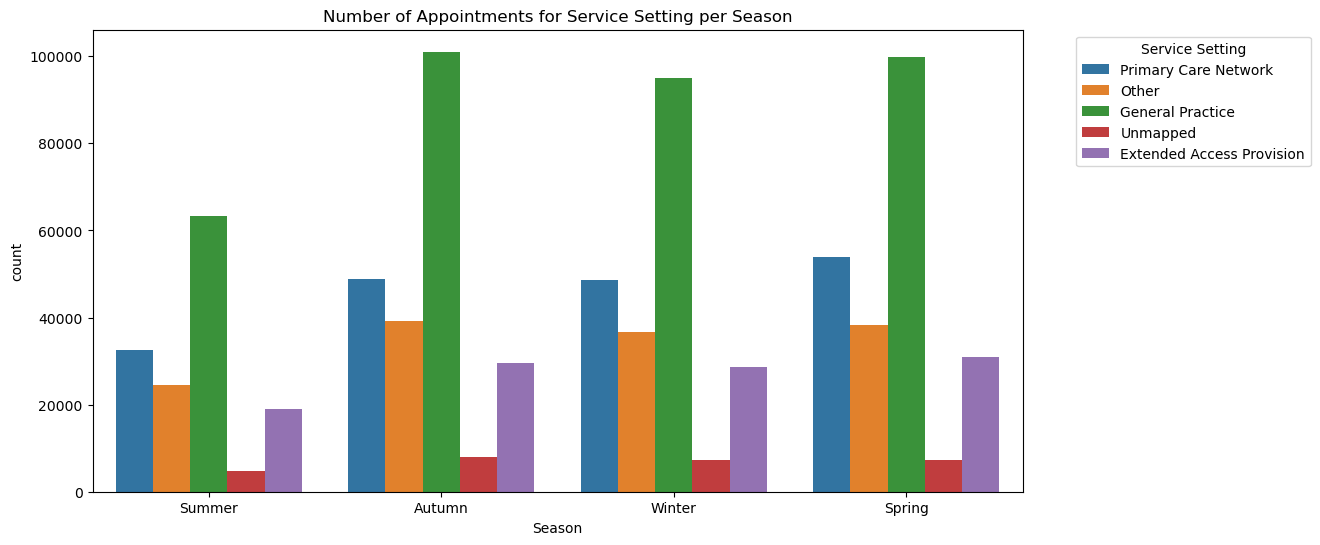

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_season(month):
    if month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'

national_categories['appointment_month'] = pd.to_datetime(national_categories['appointment_month'])

# Apply the get_season function to the 'appointment_month' column
national_categories['Season'] = national_categories['appointment_month'].dt.month.apply(get_season)

# Visualization 
plt.figure(figsize=(12, 6))
sns.countplot(data=national_categories, x='Season', hue='service_setting')
plt.title('Number of Appointments for Service Setting per Season')
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

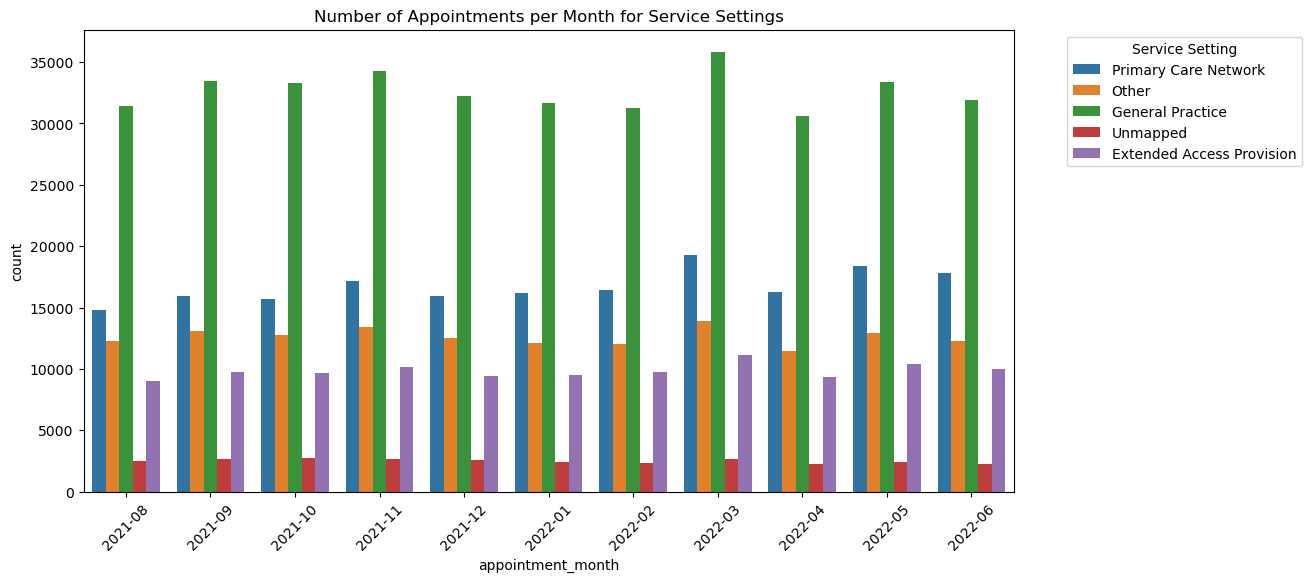

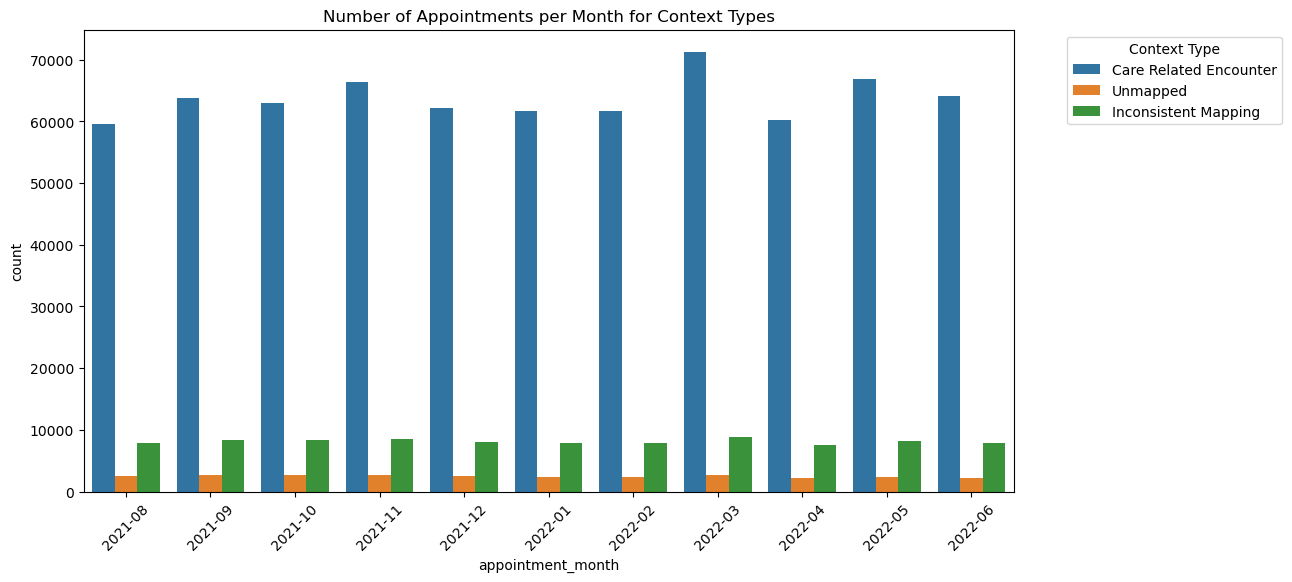

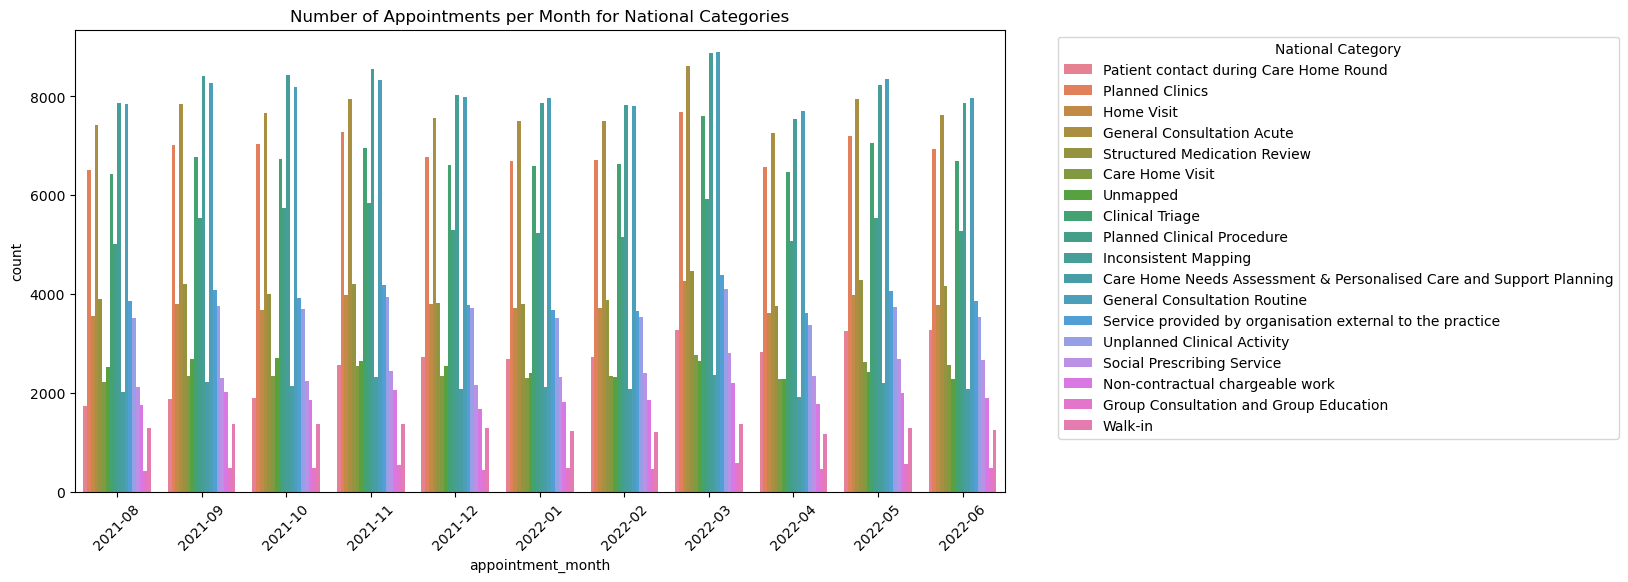

In [45]:
def get_appointments():
    national_categories['appointment_month'] = pd.to_datetime(national_categories['appointment_month']).dt.to_period('M')

    # Plotting number of appointments per month for service settings
    plt.figure(figsize=(12, 6))
    sns.countplot(data=national_categories, x='appointment_month', hue='service_setting')
    plt.xticks(rotation=45)
    plt.title('Number of Appointments per Month for Service Settings')
    plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Plotting number of appointments per month for context types
    plt.figure(figsize=(12, 6))
    sns.countplot(data=national_categories, x='appointment_month', hue='context_type')
    plt.xticks(rotation=45)
    plt.title('Number of Appointments per Month for Context Types')
    plt.legend(title='Context Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Plotting number of appointments per month for national categories
    plt.figure(figsize=(12, 6))
    sns.countplot(data=national_categories, x='appointment_month', hue='national_category')
    plt.xticks(rotation=45)
    plt.title('Number of Appointments per Month for National Categories')
    plt.legend(title='National Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Call for function
get_appointments()

In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

category = national_categories.groupby('national_category')[['count_of_appointments']]\
        .sum().sort_values('count_of_appointments', ascending=False)\
        .reset_index()\
        .rename(columns={'national_category':'National Category',\
                         'count_of_appointments':'Total Appointments'})

# Get the total number of appointments
total_nc = len(national_categories)

print("Total appointments in nc:",total_nc)

category['% of Total'] = category['Total Appointments']/total_nc * 100
category.round(1)

Total appointments in nc: 817394


,National Category,Total Appointments,% of Total
0,General Consultation Routine,97271522,11900.2
1,General Consultation Acute,53691150,6568.6
2,Clinical Triage,41546964,5082.9
3,Planned Clinics,28019748,3427.9
4,Inconsistent Mapping,27890802,3412.2
5,Planned Clinical Procedure,25702694,3144.5
6,Unmapped,11080810,1355.6
7,Unplanned Clinical Activity,3055794,373.8
8,Home Visit,2144452,262.4
9,Structured Medication Review,1858379,227.4


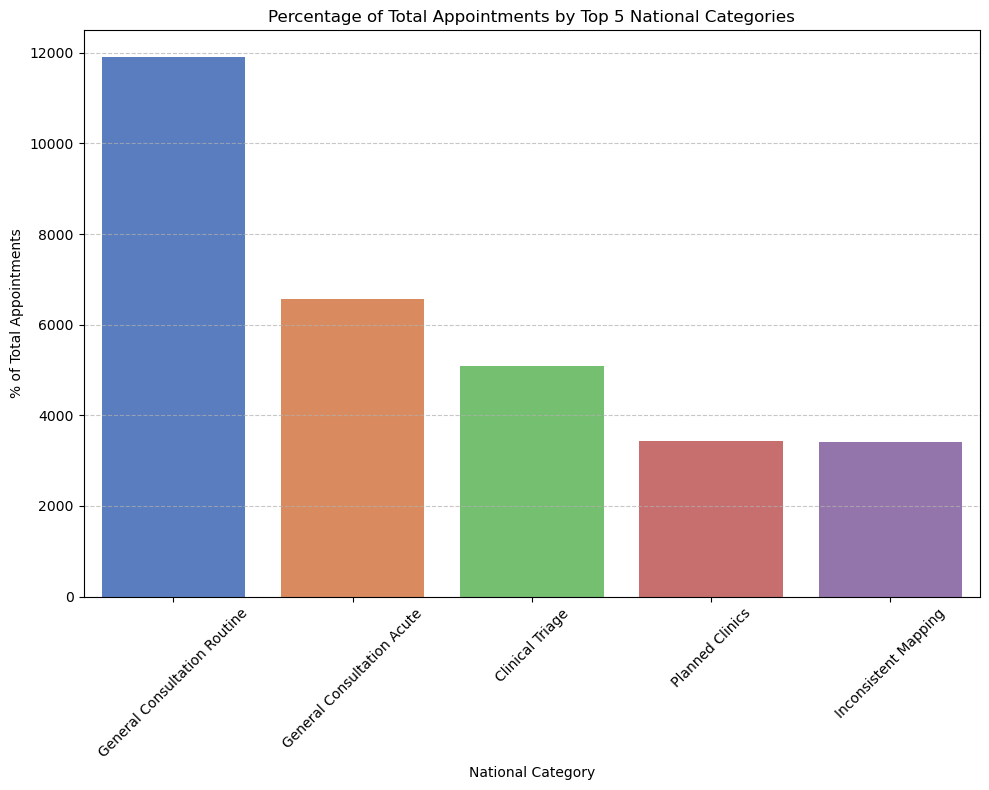

In [47]:
# Sort and select the top 5 national categories
top_5_categories = category.nlargest(5, 'Total Appointments')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(data=top_5_categories, x='National Category', y='% of Total', palette='muted')
plt.xlabel('National Category')
plt.ylabel('% of Total Appointments')
plt.title('Percentage of Total Appointments by Top 5 National Categories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

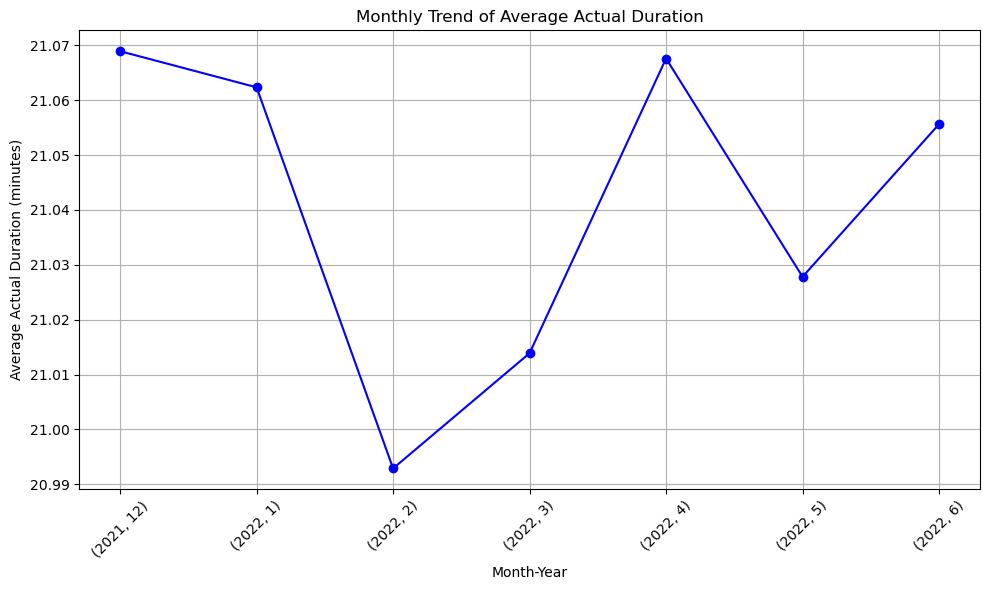

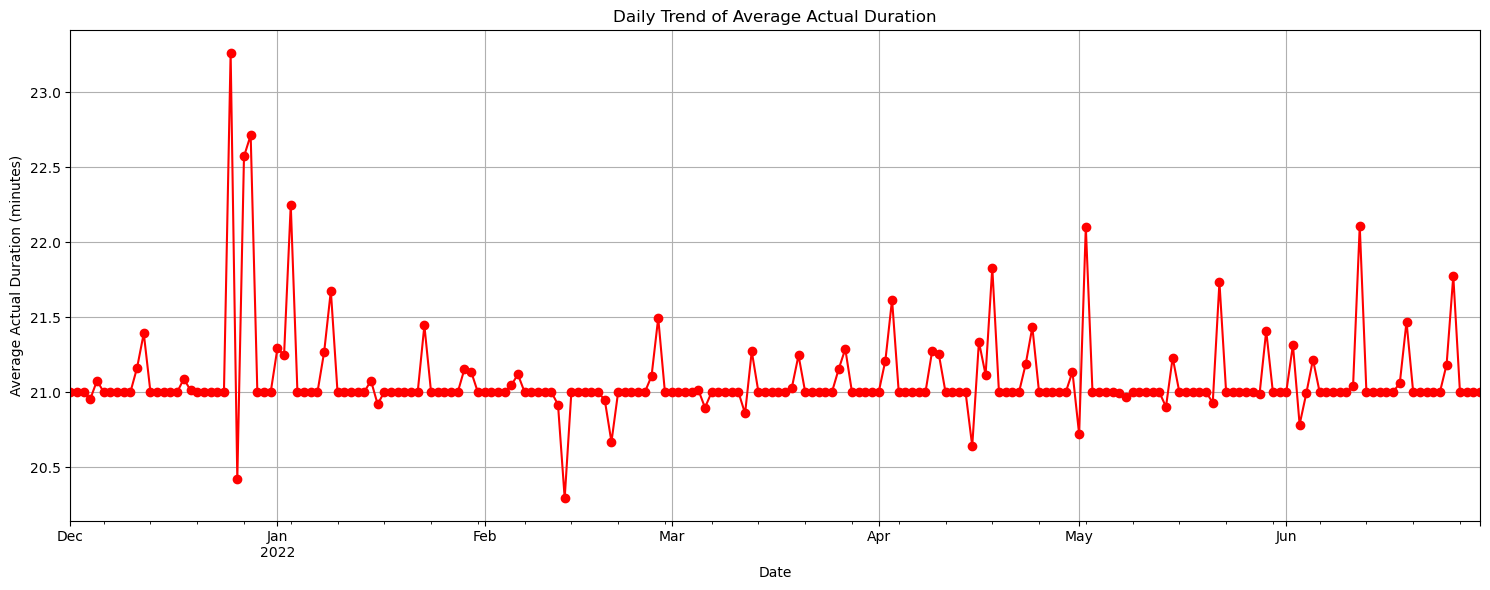

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def actual_duration():
    # Assuming 'view' is used within this function to modify behavior or data selection

    # Read the modified DataFrame from the CSV file
    actual_df = pd.read_csv('modified_actual_duration.csv')

    # Convert the 'appointment_date' column to datetime format
    actual_df['appointment_date'] = pd.to_datetime(actual_df['appointment_date'])

    # Extract month and year from 'appointment_date'
    actual_df['month'] = actual_df['appointment_date'].dt.month
    actual_df['year'] = actual_df['appointment_date'].dt.year

    # Group by month and year, and calculate the average actual_duration
    monthly_avg_duration = actual_df.groupby(['year', 'month'])['actual_duration'].mean()

    # Plotting the monthly trend
    plt.figure(figsize=(10, 6))
    monthly_avg_duration.plot(marker='o', color='blue', linestyle='-')
    plt.title('Monthly Trend of Average Actual Duration')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Actual Duration (minutes)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Convert the 'appointment_date' column to datetime format again
    # This line seems redundant as the conversion was already done above.
    # actual_df['appointment_date'] = pd.to_datetime(actual_df['appointment_date'])

    # Group by date and calculate the average actual_duration
    daily_avg_duration = actual_df.groupby('appointment_date')['actual_duration'].mean()

    # Plotting the daily trend
    plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
    daily_avg_duration.plot(marker='o', color='red', linestyle='-')
    plt.title('Daily Trend of Average Actual Duration')
    plt.xlabel('Date')
    plt.ylabel('Average Actual Duration (minutes)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# Call the function
actual_duration()

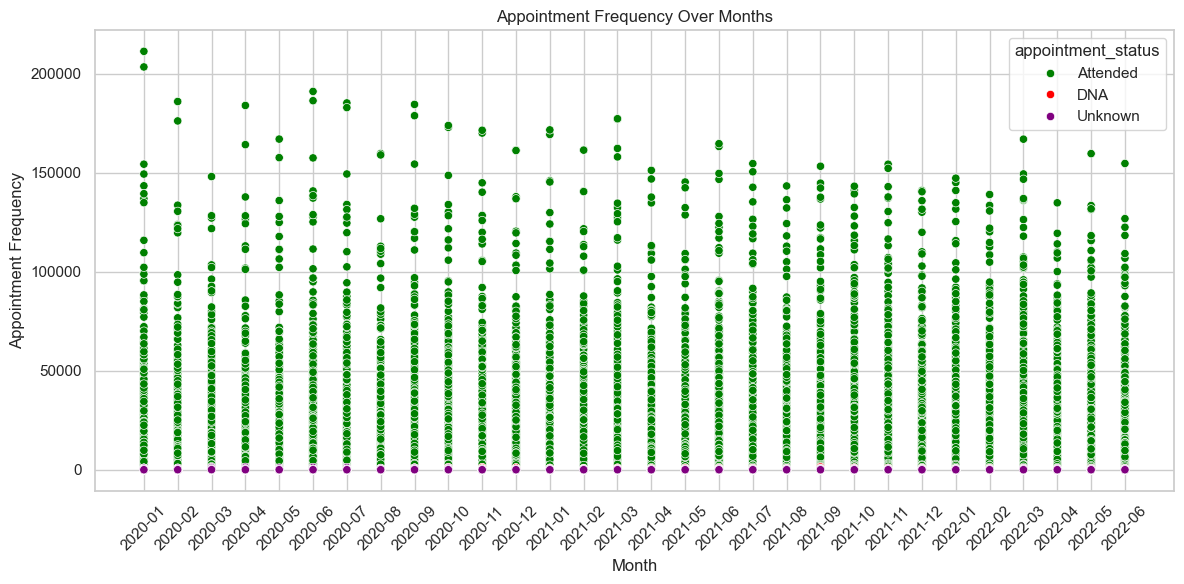

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def appointment_frequency():
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Define the color palette dictionary
    palette_colors = {'Scheduled': 'blue', 'Attended': 'green', 'DNA': 'red', 'Unknown': 'purple'}

    # Plotting appointment frequency over months as a scatter plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=appointments_regional, x='appointment_month', y='count_of_appointments', hue='appointment_status', palette=palette_colors, marker='o')

    plt.title('Appointment Frequency Over Months')
    plt.xlabel('Month')
    plt.ylabel('Appointment Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()
#Call the function 
appointment_frequency()

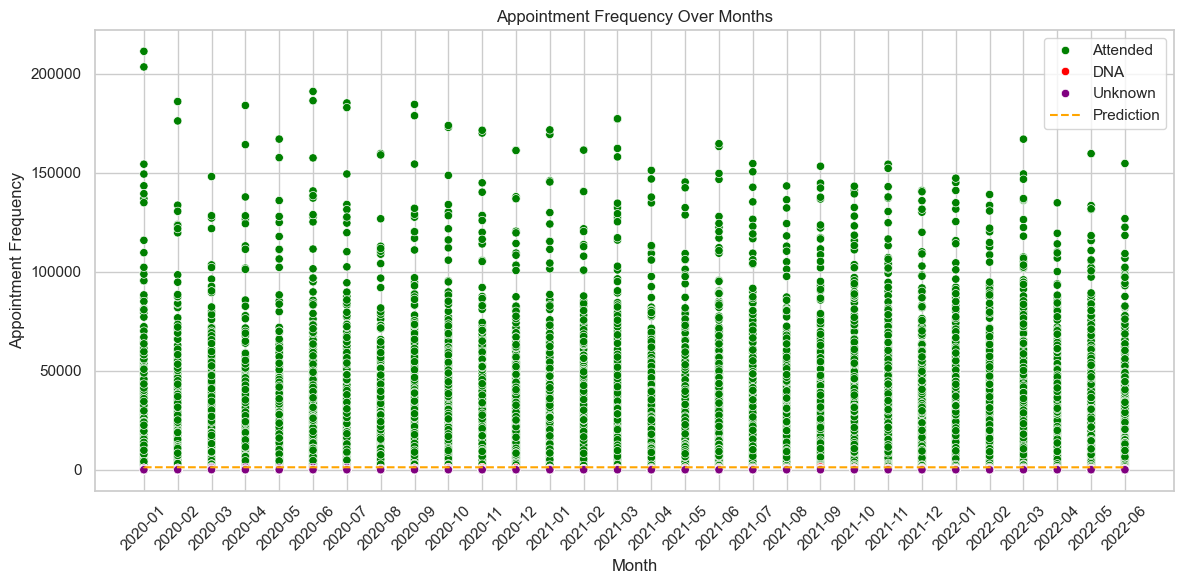

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the color palette dictionary
palette_colors = {'Scheduled': 'blue', 'Attended': 'green', 'DNA': 'red', 'Unknown': 'purple'}

# Plotting appointment frequency over months as a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=appointments_regional, x='appointment_month', y='count_of_appointments', hue='appointment_status', palette=palette_colors, marker='o')

# Fit linear regression model
X = np.arange(len(appointments_regional['appointment_month'])).reshape(-1, 1)
y = appointments_regional['count_of_appointments'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)

# Predict appointments
y_pred = regressor.predict(X)
plt.plot(appointments_regional['appointment_month'], y_pred, color='orange', linestyle='--', label='Prediction')

plt.title('Appointment Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Appointment Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()

## Assignment Activity 5: Twitter Data Analysis & web scraping: 

In [51]:
import json
from collections import Counter

# Function to safely parse JSON and extract hashtags
def extract_hashtags(json_str):
    try:
        entities = json.loads(json_str.replace("'", "\""))  # Replace single quotes with double quotes for JSON parsing
        if 'hashtags' in entities:
            return [tag['text'] for tag in entities['hashtags']]
        return []
    except json.JSONDecodeError:
        # Return an empty list in case of JSON parsing error
        return []

# Apply the function to the tweet_entities column
tweets['hashtags'] = tweets['tweet_entities'].apply(extract_hashtags)

# Flatten the list of hashtags and count occurrences
all_hashtags = sum(tweets['hashtags'], [])
hashtag_counts = Counter(all_hashtags)

# Display top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
print(top_hashtags)

[('healthcare', 592), ('Healthcare', 196), ('health', 68), ('HealthCare', 47), ('AI', 45), ('medicine', 42), ('job', 38), ('strategy', 31), ('medical', 30), ('MedTwitter', 25)]


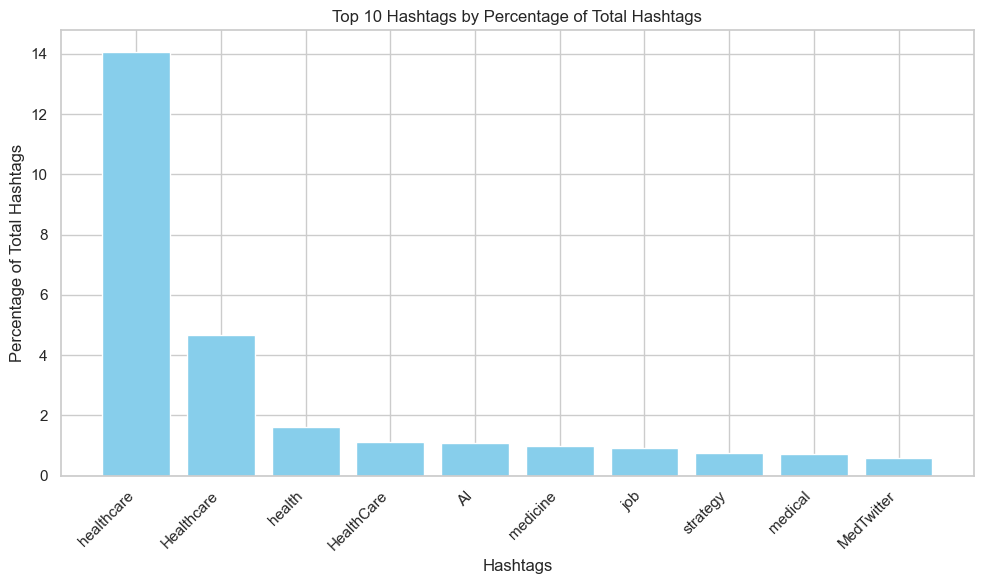

In [52]:
import matplotlib.pyplot as plt

# Calculate total number of hashtags
total_hashtags = len(all_hashtags)

# Extract top 10 hashtags and their counts
top_hashtags = hashtag_counts.most_common(10)

# Extract hashtags and counts
hashtags, counts = zip(*top_hashtags)

# Convert counts to percentages
percentages = [(count / total_hashtags) * 100 for count in counts]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hashtags, percentages, color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Percentage of Total Hashtags')
plt.title('Top 10 Hashtags by Percentage of Total Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
# Import the necessary packages.
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [54]:
# URL with parameters to filter opinions
url = "https://www.careopinion.org.uk/opinions"

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the page
    html_content = response.text
    
    # Create a BeautifulSoup object
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Print the prettified HTML
    print(soup.prettify())
else:
    print("Failed to retrieve data from the website.")

<!DOCTYPE html>
<!--[if lt IE 7 ]> <html prefix="og: http://ogp.me/ns#" lang="en" class="no-js ie6"> <![endif]-->
<!--[if IE 7 ]>    <html prefix="og: http://ogp.me/ns#" lang="en" class="no-js ie7"> <![endif]-->
<!--[if IE 8 ]>    <html prefix="og: http://ogp.me/ns#" lang="en" class="no-js ie8"> <![endif]-->
<!--[if IE 9 ]>    <html prefix="og: http://ogp.me/ns#" lang="en" class="no-js ie9"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js overflow-a" lang="en" prefix="og: http://ogp.me/ns#">
 <!--<![endif]-->
 <head>
  <!--[if lt IE 9]>
        <script src="https://html5shim.googlecode.com/svn/trunk/html5.js"></script>
    <![endif]-->
  <!--[if lte IE 8]>
        <script src="/content/js/json2.min.js"></script>
    <![endif]-->
  <!-- Basic metadata -->
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Care Opinion CIC, UK" name="copyright"/>
  <meta 

In [55]:
import requests

# Define the API endpoint URL
api_url = "https://www.careopinion.org.uk/api/v2/opinions"


params = {
    "tag": "waiting"  # Replace "waiting" with the desired tag or search term
}

# Make a GET request to the API endpoint
response = requests.get(api_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Extract relevant information from the JSON data
    opinions = data.get('data', [])

    # Print the opinions
    for opinion in opinions:
        print(opinion['content'])  # Adjust 'content' based on the structure of the JSON data

else:
    print(f"Failed to retrieve data from the API. Status code: {response.status_code}")

Failed to retrieve data from the API. Status code: 403


In [56]:
import requests
from bs4 import BeautifulSoup

# URL with parameters to filter opinions
url = "https://www.careopinion.org.uk/opinions"

# Make a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the page
    html_content = response.text
    
    # Create a BeautifulSoup object
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Find elements containing the text 'Emergency', 'Waiting', and 'GP'
    emergency_elements = soup.find_all(text='emergency')
    waiting_elements = soup.find_all(text='waiting')
    gp_elements = soup.find_all(text='gp')

    # Calculate the total count of occurrences
    total_count = len(emergency_elements) + len(waiting_elements) + len(gp_elements)

    # Print the total count
    print("Total occurrences of 'Emergency', 'Waiting', and 'GP':", total_count)

else:
    print("Failed to retrieve data from the website.")

Total occurrences of 'Emergency', 'Waiting', and 'GP': 0


In [57]:
import tweepy
import json
import os

In [58]:
# Twitter API credentials
api_key = "Wj5Ck0AU6FdSV7Hxa8UZUW7lr"
api_secret_key = "vYArsdEpi8E4SeIA4HWAXkaIuGqXU3DgLJZzDU3sCZEXzODyW2"
access_token = "3016371621-pUN1DxUq1U8ezvUn5aUdOSv62aYyYAkKz8UTa0C"
access_token_secret = "geZEVFC2V8mz4T6ATcqKFgOjLhnVft068LKZ4yXSosetg"

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Define query parameters
query = "healthcare"

# Define JSON filename
json_filename = "healthcare_tweets.json"

# Load existing tweet data or initialize an empty list
if os.path.exists(json_filename) and os.path.getsize(json_filename) > 0:
    with open(json_filename, 'r', encoding='utf-8') as file:
        tweets_data = json.load(file)
else:
    tweets_data = []

# Check the remaining tweet quota
remaining_quota = 1000 - len(tweets_data)

# Fetch recent tweets related to healthcare
new_tweets = tweepy.Cursor(api.search_tweets, q=query, tweet_mode="extended").items(remaining_quota)

# Extract JSON data from new tweets and append to the existing list
for tweet in new_tweets:
    tweets_data.append(tweet._json)

# Save the updated tweets data to the JSON file
with open(json_filename, 'w', encoding='utf-8') as file:
    json.dump(tweets_data, file, ensure_ascii=False, indent=4)

print(f"Added {len(new_tweets)} new tweets related to healthcare to {json_filename}")

Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

#### developer account settings or upgrade your account to access the full range of Twitter API endpoints.

In [59]:
import requests
import json
import os

# Twitter API v2 Bearer Token
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGmvsQEAAAAAOelLDquqx24QoKh0oL3PIc1RpZ0%3D9KZobqKuDSAJib8Qeoef9MoiipagJTGPDfBygamGk5nz0u7co9"

# Define username and JSON filename
username = "NHS"
json_filename = "nhs_improvement_tweets.json"

# Twitter API v2 endpoint for user tweets
endpoint = f"https://api.twitter.com/2/users/by/username/{username}/tweets"

# Load existing tweet data or initialize an empty list
if os.path.exists(json_filename) and os.path.getsize(json_filename) > 0:
    with open(json_filename, 'r', encoding='utf-8') as file:
        tweets_data = json.load(file)
else:
    tweets_data = []

# Check the remaining tweet quota
remaining_quota = 1000 - len(tweets_data)

# Twitter API v2 request headers
headers = {
    "Authorization": f"Bearer {bearer_token}",
    "Content-Type": "application/json"
}

# Twitter API v2 request parameters
params = {
    "max_results": remaining_quota,  # Adjusted to fit within the remaining quota
    "tweet.fields": "id,created_at,text"  # Specify fields to include in the response
}

# Fetch recent tweets from the account using Twitter API v2
response = requests.get(endpoint, headers=headers, params=params)

# Handle response
if response.status_code == 200:
    new_tweets = response.json()["data"]

    # Append new tweets to the tweets_data list
    tweets_data.extend(new_tweets)

    # Save the updated tweets data to the JSON file
    with open(json_filename, 'w', encoding='utf-8') as file:
        json.dump(tweets_data, file, ensure_ascii=False, indent=4)

    print(f"Added {len(new_tweets)} new tweets to {json_filename}")
else:
    print(f"Error: {response.status_code} - {response.text}")

Error: 404 - {"errors":[{"message":"Sorry, that page does not exist","code":34}]}


## Number of Unique Entities in Each Category:

In [69]:
# Unique settings
# Unique counts for 'national_categories' 
print("Unique locations:", national_categories['sub_icb_location_name'].nunique())
print("Unique service settings:", national_categories['service_setting'].nunique())
print("Unique context types:", national_categories['context_type'].nunique())
print("Unique national categories:", national_categories['national_category'].nunique())

# Unique counts for 'appointments_regional'
print("Unique appointment statuses:", appointments_regional['appointment_status'].nunique())

Unique locations: 106
Unique service settings: 5
Unique context types: 3
Unique national categories: 18
Unique appointment statuses: 3


## Number of Appointments and Records Per Month:

In [63]:
# Group by 'appointment_month' 
monthly_appointments_nc = national_categories.groupby('appointment_month')['count_of_appointments'].sum()
print("Appointments per month for national_categories:\n", monthly_appointments_nc)

# grouping for the 'appointments_regional' dataset
monthly_appointments_ar = appointments_regional.groupby('appointment_month')['count_of_appointments'].sum()
print("Appointments per month for appointments_regional:\n", monthly_appointments_ar)

#grouping for the 'actual_duration' dataset 
monthly_appointments_ad = actual_duration.groupby('appointment_date')['count_of_appointments'].sum()
print("Appointments per month for actual_duration:\n", monthly_appointments_ad)

Appointments per month for national_categories:
 appointment_month
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Name: count_of_appointments, dtype: int64
Appointments per month for appointments_regional:
 appointment_month
2020-01    27199296
2020-02    24104621
2020-03    24053468
2020-04    16007881
2020-05    16417212
2020-06    20690805
2020-07    22491437
2020-08    20150520
2020-09    26714255
2020-10    28301932
2020-11    25061602
2020-12    23535936
2021-01    22492069
2021-02    22399569
2021-03    27225424
2021-04    23879932
2021-05    23508395
2021-06    26784182
2021-07    25739219
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Na

#### records are written in a different date format so they needed to be converted 

In [64]:
import pandas as pd

# Convert 'appointment_month' column to datetime format in 'national_categories' and 'appointments_regional' datasets
national_categories['appointment_month'] = pd.to_datetime(national_categories['appointment_month'])
appointments_regional['appointment_month'] = pd.to_datetime(appointments_regional['appointment_month'])

# Extract 'YYYY-MM' format from 'appointment_month' column
national_categories['appointment_month'] = national_categories['appointment_month'].dt.to_period('M')
appointments_regional['appointment_month'] = appointments_regional['appointment_month'].dt.to_period('M')

# Assuming 'actual_duration' DataFrame is also present and 'appointment_date' column needs to be converted
actual_duration['appointment_date'] = pd.to_datetime(actual_duration['appointment_date'])

# Extract 'YYYY-MM' format from 'appointment_date' column
actual_duration['appointment_month'] = actual_duration['appointment_date'].dt.to_period('M')

# Group by 'appointment_month' for each dataset
monthly_appointments_nc = national_categories.groupby('appointment_month')['count_of_appointments'].sum()
print("Appointments per month for national_categories:\n", monthly_appointments_nc)

monthly_appointments_ar = appointments_regional.groupby('appointment_month')['count_of_appointments'].sum()
print("Appointments per month for appointments_regional:\n", monthly_appointments_ar)

monthly_appointments_ad = actual_duration.groupby('appointment_month')['count_of_appointments'].sum()
print("Appointments per month for actual_duration:\n", monthly_appointments_ad)

Appointments per month for national_categories:
 appointment_month
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Freq: M, Name: count_of_appointments, dtype: int64
Appointments per month for appointments_regional:
 appointment_month
2020-01    27199296
2020-02    24104621
2020-03    24053468
2020-04    16007881
2020-05    16417212
2020-06    20690805
2020-07    22491437
2020-08    20150520
2020-09    26714255
2020-10    28301932
2020-11    25061602
2020-12    23535936
2021-01    22492069
2021-02    22399569
2021-03    27225424
2021-04    23879932
2021-05    23508395
2021-06    26784182
2021-07    25739219
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25

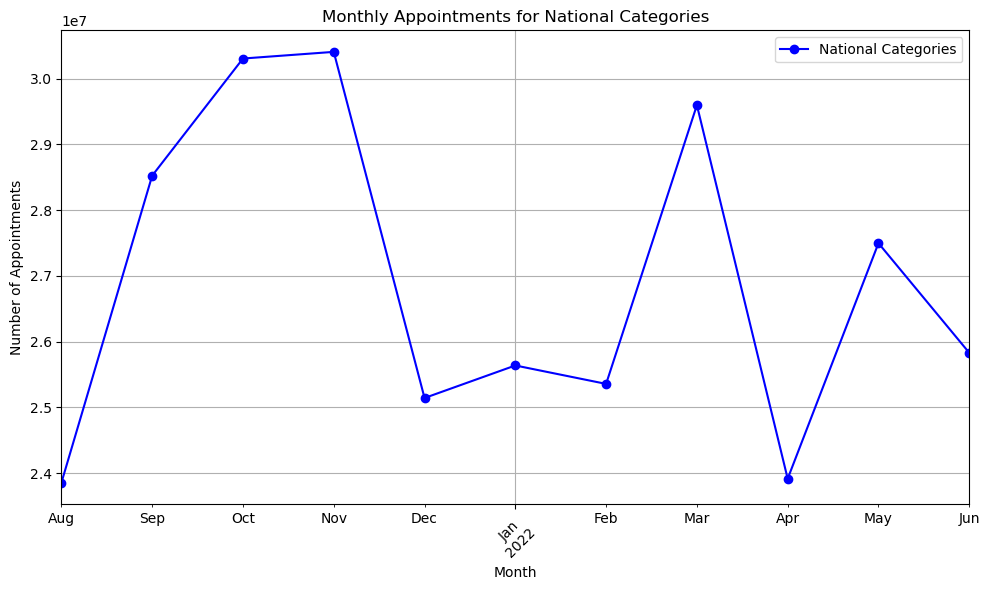

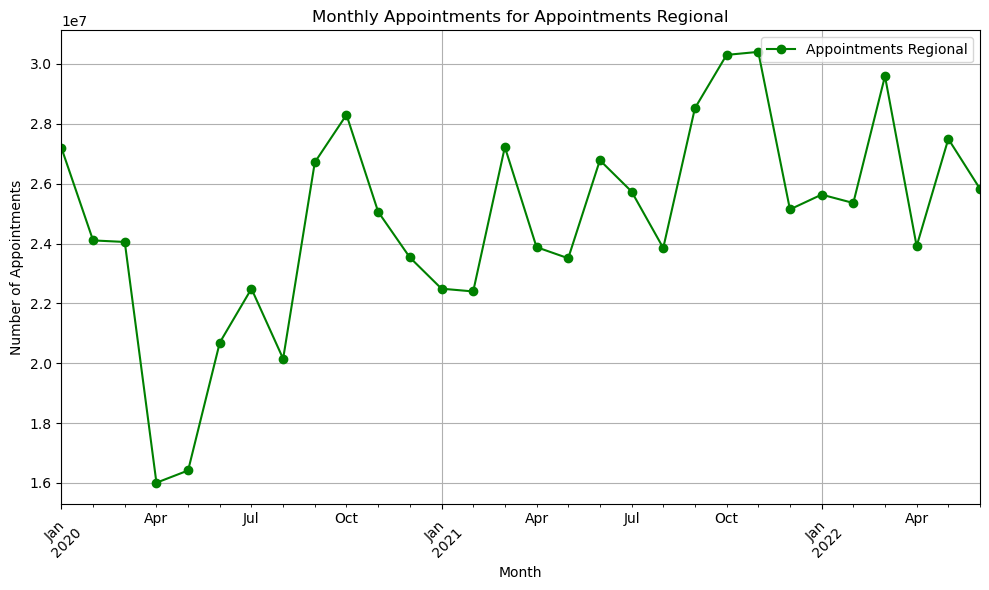

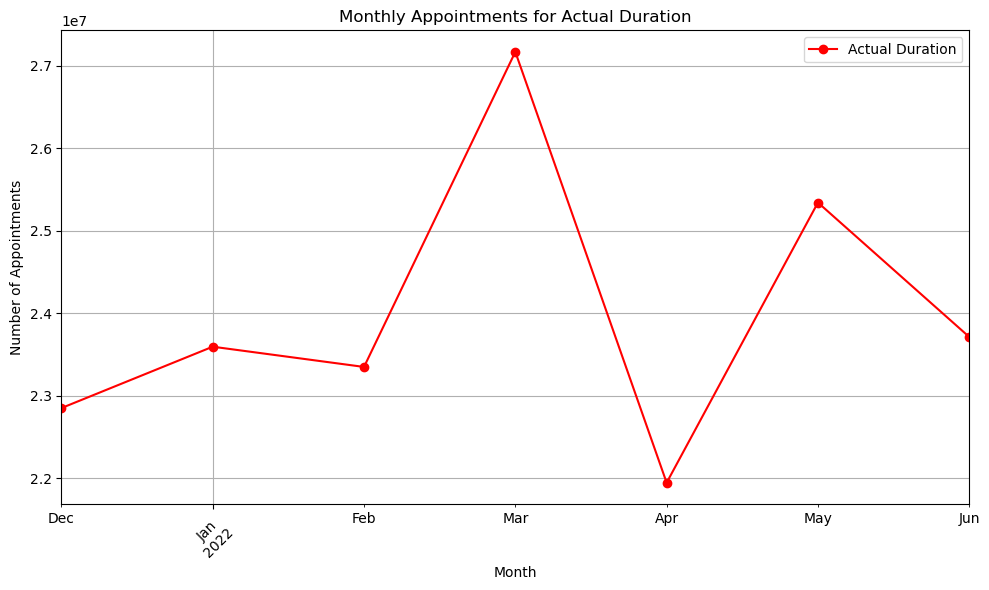

In [16]:
import matplotlib.pyplot as plt

# Plotting monthly appointments for national_categories
plt.figure(figsize=(10, 6))
monthly_appointments_nc.plot(marker='o', color='blue', linestyle='-', label='National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Monthly Appointments for National Categories')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting monthly appointments for appointments_regional
plt.figure(figsize=(10, 6))
monthly_appointments_ar.plot(marker='o', color='green', linestyle='-', label='Appointments Regional')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Monthly Appointments for Appointments Regional')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting monthly appointments for actual_duration
plt.figure(figsize=(10, 6))
monthly_appointments_ad.plot(marker='o', color='red', linestyle='-', label='Actual Duration')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Monthly Appointments for Actual Duration')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### based on quadrents 

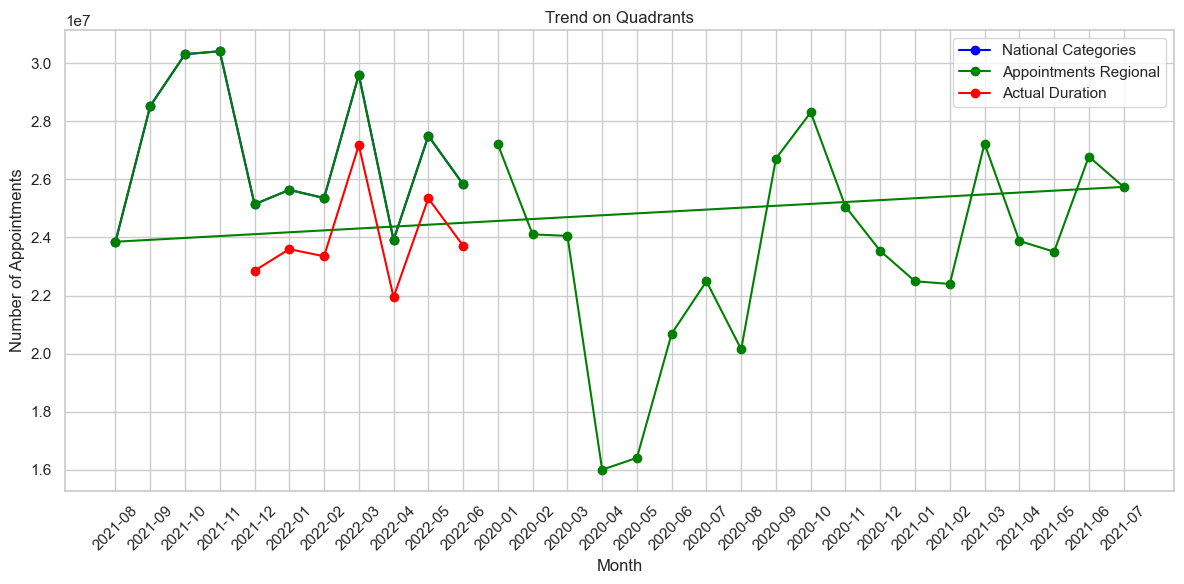

In [65]:
import matplotlib.pyplot as plt

# Convert Period objects to strings representing month and year
monthly_appointments_nc.index = monthly_appointments_nc.index.strftime('%Y-%m')
monthly_appointments_ar.index = monthly_appointments_ar.index.strftime('%Y-%m')
monthly_appointments_ad.index = monthly_appointments_ad.index.strftime('%Y-%m')

# Plotting the trend on quadrants
plt.figure(figsize=(12, 6))

# Plotting monthly appointments for national_categories
plt.plot(monthly_appointments_nc.index, monthly_appointments_nc.values, marker='o', color='blue', label='National Categories')

# Plotting monthly appointments for appointments_regional
plt.plot(monthly_appointments_ar.index, monthly_appointments_ar.values, marker='o', color='green', label='Appointments Regional')

# Plotting monthly appointments for actual_duration
plt.plot(monthly_appointments_ad.index, monthly_appointments_ad.values, marker='o', color='red', label='Actual Duration')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Trend on Quadrants')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly and Seasonal Trends:

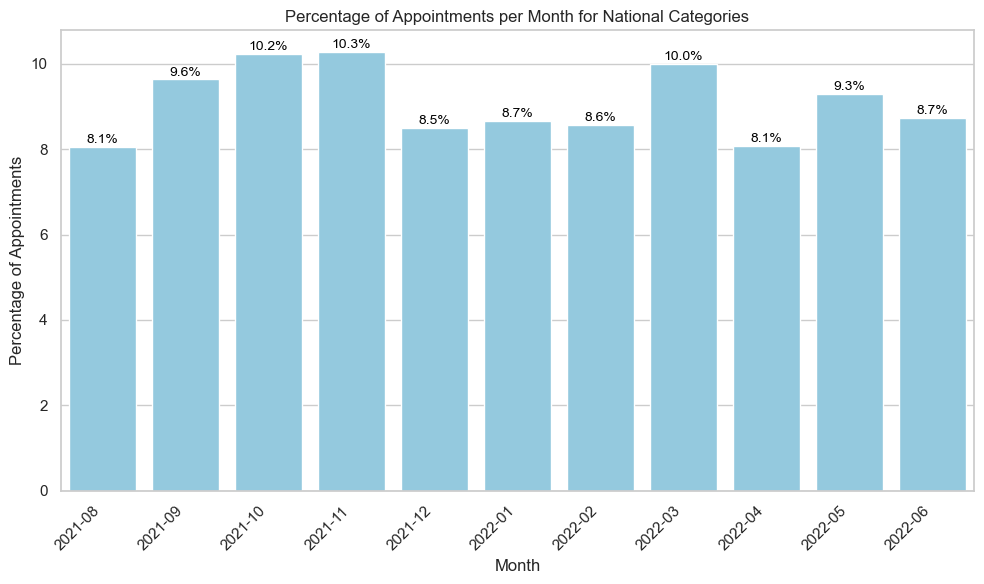

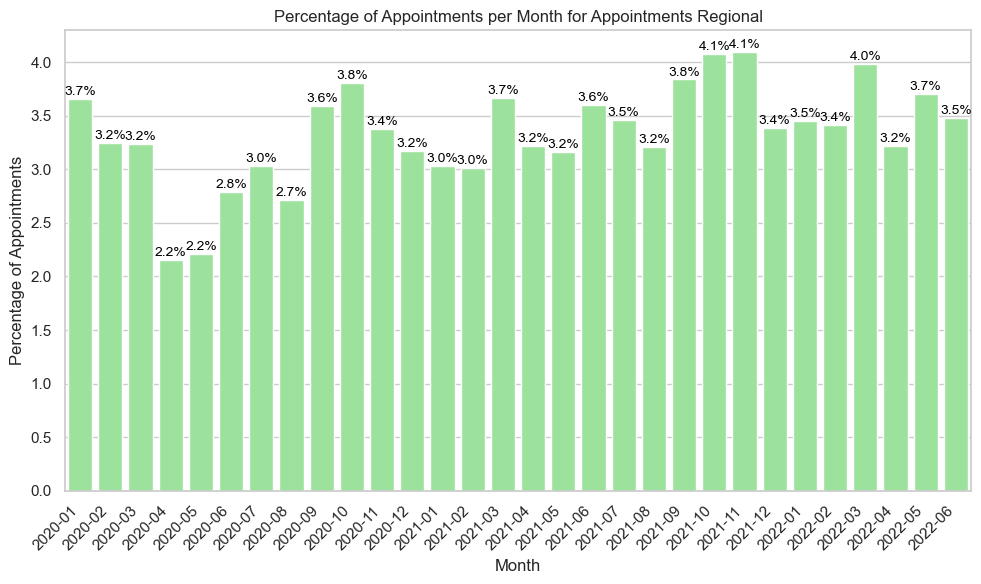

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def appointments_by_percentage(monthly_appointments_nc, monthly_appointments_ar):
    """
    Plots the percentage of appointments per month for national_categories and appointments_regional.

    Parameters:
    - monthly_appointments_nc: A pandas Series with monthly appointments count for national_categories.
    - monthly_appointments_ar: A pandas Series with monthly appointments count for appointments_regional.
    """
    # Calculate the total appointments for national_categories and appointments_regional
    total_nc = monthly_appointments_nc.sum()
    total_ar = monthly_appointments_ar.sum()

    # Calculate the percentage of appointments per month for each dataset
    percentage_nc = (monthly_appointments_nc / total_nc) * 100
    percentage_ar = (monthly_appointments_ar / total_ar) * 100

    # Plotting the percentages for national_categories
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentage_nc.index, y=percentage_nc.values, color='skyblue')
    ax.set(xlabel='Month', ylabel='Percentage of Appointments', title='Percentage of Appointments per Month for National Categories')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()

    # Plotting the percentages for appointments_regional
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentage_ar.index, y=percentage_ar.values, color='lightgreen')
    ax.set(xlabel='Month', ylabel='Percentage of Appointments', title='Percentage of Appointments per Month for Appointments Regional')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()

appointments_by_percentage(monthly_appointments_nc, monthly_appointments_ar)

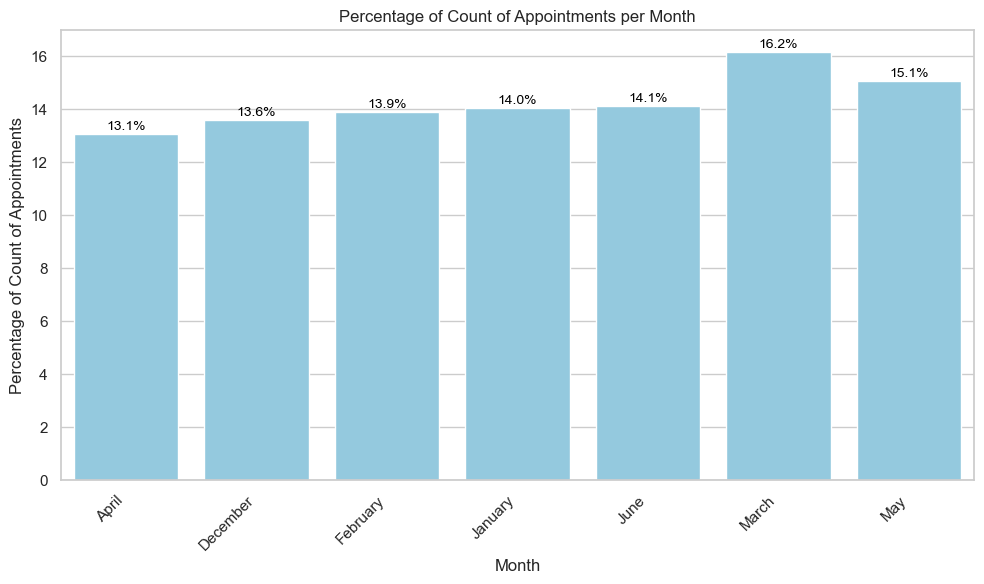

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the actual_duration dataset
actual_df = pd.read_csv('modified_actual_duration.csv')

# Convert 'appointment_date' to datetime format
actual_df['appointment_date'] = pd.to_datetime(actual_df['appointment_date'])

# Extract month names from 'appointment_date'
actual_df['appointment_month'] = actual_df['appointment_date'].dt.strftime('%B')

# Group by 'appointment_month' and count the number of appointments
count_appointments_per_month = actual_df.groupby('appointment_month')['count_of_appointments'].sum()

# Calculate the total count of appointments
total_appointments = count_appointments_per_month.sum()

# Calculate the percentage of count of appointments per month
percentage_appointments = (count_appointments_per_month / total_appointments) * 100

# Plotting the percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_appointments.index, y=percentage_appointments.values, color='skyblue')
ax.set(xlabel='Month', ylabel='Percentage of Count of Appointments', title='Percentage of Count of Appointments per Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

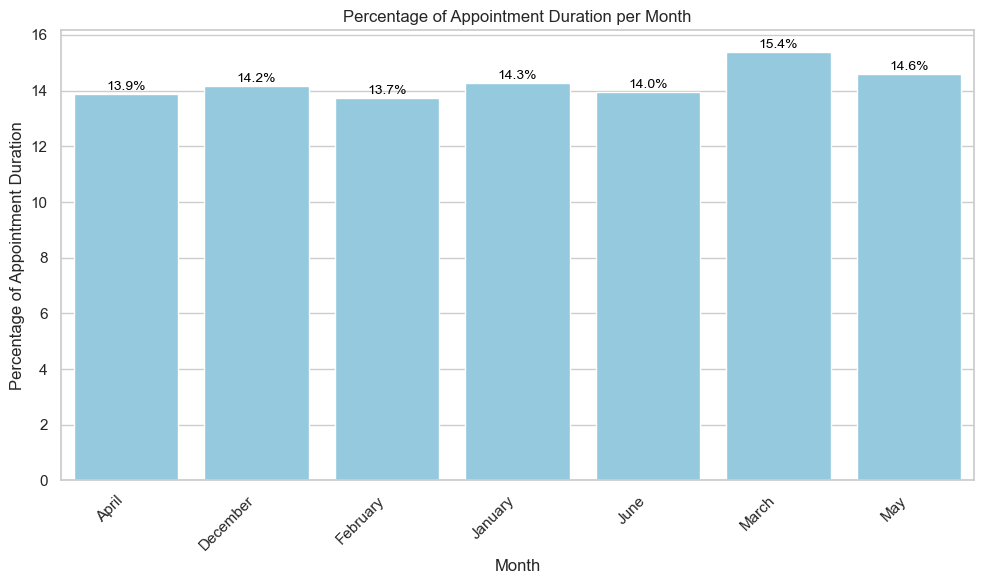

In [22]:
# Load the actual_duration dataset
actual_df = pd.read_csv('modified_actual_duration.csv')

# Convert 'appointment_date' to datetime format
actual_df['appointment_date'] = pd.to_datetime(actual_df['appointment_date'])

# Extract month names from 'appointment_date'
actual_df['appointment_month'] = actual_df['appointment_date'].dt.strftime('%B')

# Group by 'appointment_month' and sum the duration of appointments
total_duration_per_month = actual_df.groupby('appointment_month')['actual_duration'].sum()

# Calculate the total duration of appointments
total_duration = total_duration_per_month.sum()

# Calculate the percentage of appointment duration per month
percentage_duration = (total_duration_per_month / total_duration) * 100

# Plotting the percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_duration.index, y=percentage_duration.values, color='skyblue')
ax.set(xlabel='Month', ylabel='Percentage of Appointment Duration', title='Percentage of Appointment Duration per Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

## Actual Utilisation of Resources:

In [68]:
utilization_summary = actual_duration.groupby('actual_duration')['count_of_appointments'].sum()
print("Actual utilization summary:\n", utilization_summary)

Actual utilization summary:
 actual_duration
1-5 Minutes               28600865
11-15 Minutes             25160882
16-20 Minutes             16004247
21-30 Minutes             15026365
31-60 Minutes              9103432
6-10 Minutes              33800815
Unknown / Data Quality    40284086
Name: count_of_appointments, dtype: int64


## Missed Appointments Insights:

In [70]:
## import pandas library
import pandas as pd

# read the data from a csv file
#Unique appointment statuses: 3
appointments_regional = pd.read_csv("appointments_regional.csv")

# filter the rows where appointment_status is 'Did Not Attend'
missed_appointments_df = appointments_regional[appointments_regional['appointment_status'] == 'DNA']
attended_appointments_df = appointments_regional[appointments_regional['appointment_status'] == 'Attended']
unknown_appointments_df = appointments_regional[appointments_regional['appointment_status'] == 'Unknown']

# sum up the count_of_appointments column
missed_appointments = missed_appointments_df['count_of_appointments'].sum()
attended_appointments = attended_appointments_df['count_of_appointments'].sum()
unknown_appointments = unknown_appointments_df['count_of_appointments'].sum()

# print the result
print("Total number of missed appointments:", missed_appointments)
print("Total number of attended appointments:",attended_appointments )
print("Total number of unknown appointments:",unknown_appointments)

Total number of missed appointments: 30911233
Total number of attended appointments: 677755876
Total number of unknown appointments: 34137416


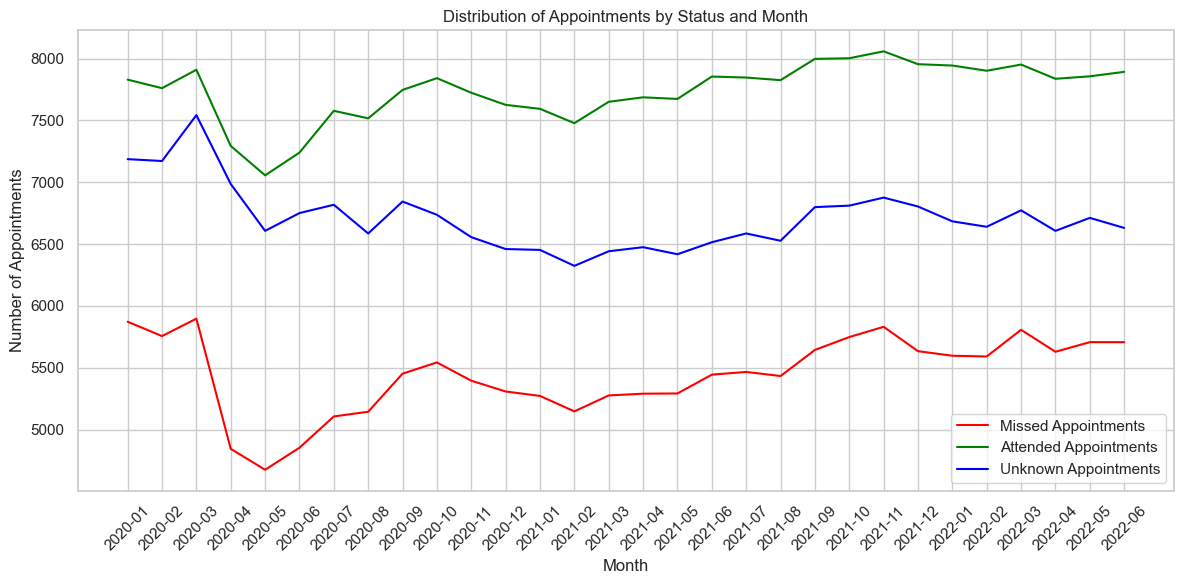

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

def get_missing_appointments():
   # Read the data from a csv file
   appointments_regional = pd.read_csv("appointments_regional.csv")

   # Convert the appointment_date to datetime format
   appointments_regional['appointment_month'] = pd.to_datetime(appointments_regional['appointment_month'])

   # Extract the month from the appointment_date and map it to the name of the month
   appointments_regional['appointment_month'] = appointments_regional['appointment_month'].dt.month_name()

# Filter the rows where appointment_status is 'Did Not Attend', 'Attended', 'Unknown'
missed_appointments_df = appointments_regional[appointments_regional['appointment_status'] == 'DNA']
attended_appointments_df = appointments_regional[appointments_regional['appointment_status'] == 'Attended']
unknown_appointments_df = appointments_regional[appointments_regional['appointment_status'] == 'Unknown']

# Group by appointment_month and count the number of appointments for each status
missed_appointments_by_month = missed_appointments_df.groupby('appointment_month').size()
attended_appointments_by_month = attended_appointments_df.groupby('appointment_month').size()
unknown_appointments_by_month = unknown_appointments_df.groupby('appointment_month').size()

# Creating the line plot for missed appointments
plt.figure(figsize=(12, 6))
plt.plot(missed_appointments_by_month.index, missed_appointments_by_month.values, color='red', label='Missed Appointments')

# Creating the line plot for attended appointments
plt.plot(attended_appointments_by_month.index, attended_appointments_by_month.values, color='green', label='Attended Appointments')

# Creating the line plot for unknown appointments
plt.plot(unknown_appointments_by_month.index, unknown_appointments_by_month.values, color='blue', label='Unknown Appointments')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Distribution of Appointments by Status and Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

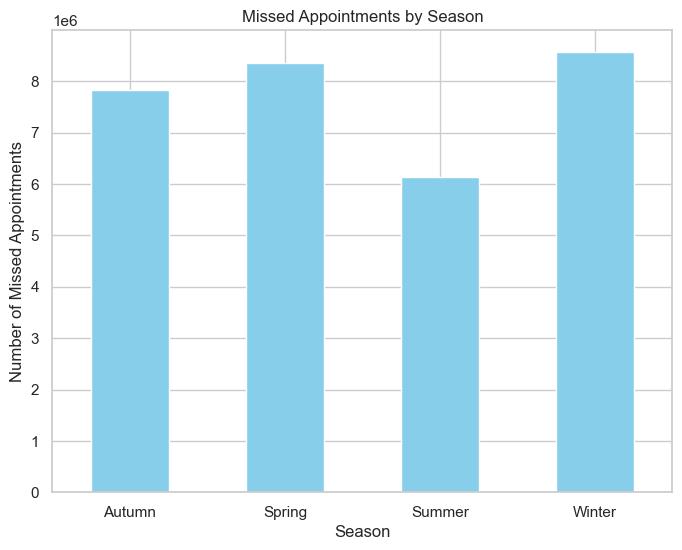

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a csv file
appointments_regional = pd.read_csv("appointments_regional.csv")

# Convert the appointment_date to datetime format
appointments_regional['appointment_month'] = pd.to_datetime(appointments_regional['appointment_month'])

# Extract the month and map it to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

appointments_regional['appointment_season'] = appointments_regional['appointment_month'].dt.month.map(get_season)

# Filter the rows where appointment_status is 'Did Not Attend'
missed_appointments_df = appointments_regional[appointments_regional['appointment_status'] == 'DNA']

# Group by appointment season and sum up the count_of_appointments column
missed_appointments_by_season = missed_appointments_df.groupby('appointment_season')['count_of_appointments'].sum()

# Plotting the missed appointments by season
plt.figure(figsize=(8, 6))
missed_appointments_by_season.plot(kind='bar', color='skyblue')
plt.title('Missed Appointments by Season')
plt.xlabel('Season')
plt.ylabel('Number of Missed Appointments')
plt.xticks(rotation=0)
plt.show()

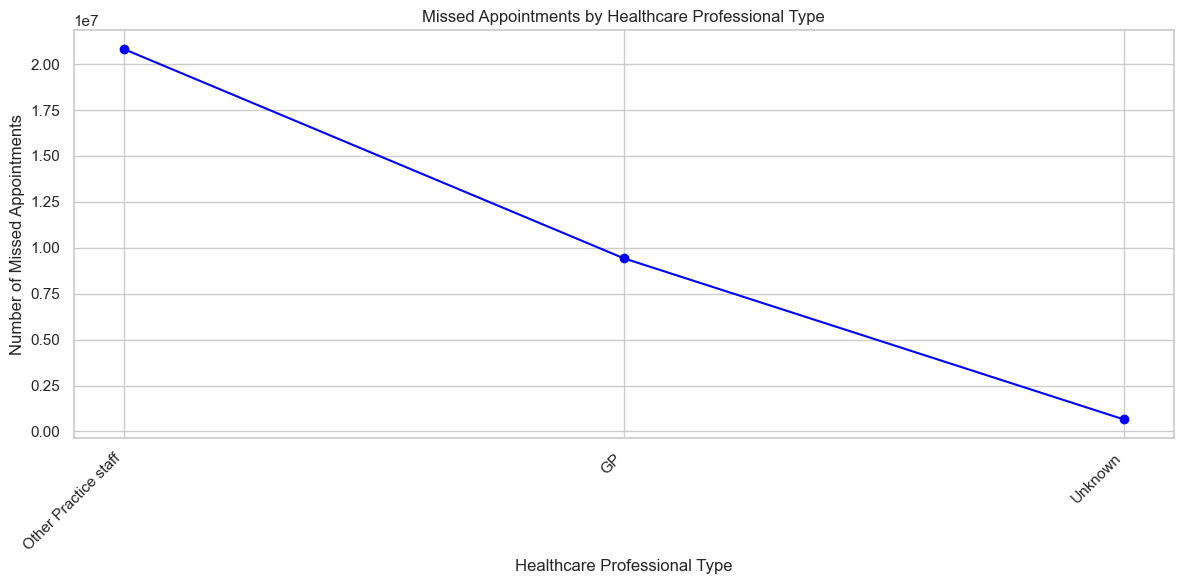

In [73]:
import matplotlib.pyplot as plt

# Group the missed appointments data by 'hcp_type' and sum the counts
missed_by_hcp = missed_appointments_df.groupby('hcp_type')['count_of_appointments'].sum()

# Convert the grouped data to a DataFrame for easier plotting
missed_by_hcp_df = missed_by_hcp.reset_index()

# Sort the DataFrame by count_of_appointments in descending order
missed_by_hcp_df = missed_by_hcp_df.sort_values(by='count_of_appointments', ascending=False)

# Plotting the curve
plt.figure(figsize=(12, 6))
plt.plot(missed_by_hcp_df['hcp_type'], missed_by_hcp_df['count_of_appointments'], marker='o', color='blue', linestyle='-')
plt.xlabel('Healthcare Professional Type')
plt.ylabel('Number of Missed Appointments')
plt.title('Missed Appointments by Healthcare Professional Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

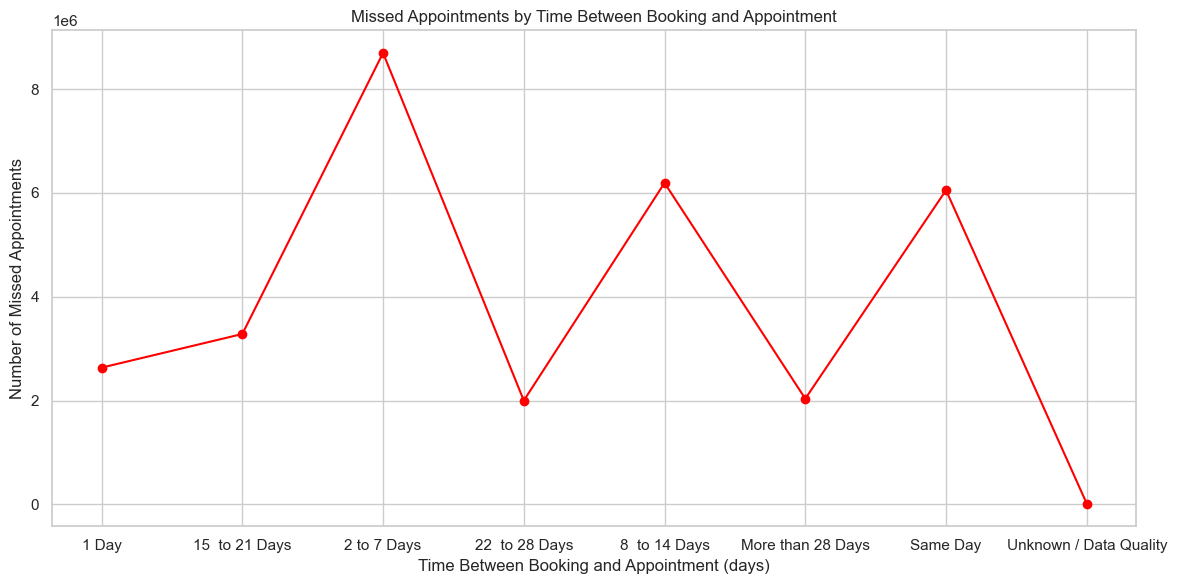

In [74]:
import matplotlib.pyplot as plt
#to sum missed appoitments in realtion to time_between_booking_and_appoitment' data type is changed to integers 
# Group the missed appointments data by 'time_between_book_and_appointment' and sum the counts
missed_by_time = missed_appointments_df.groupby('time_between_book_and_appointment')['count_of_appointments'].sum()

# Convert the grouped data to a DataFrame for easier plotting
missed_by_time_df = missed_by_time.reset_index()

# Sort the DataFrame by time_between_book_and_appointment
missed_by_time_df = missed_by_time_df.sort_values(by='time_between_book_and_appointment')

# Plotting the curve
plt.figure(figsize=(12, 6))
plt.plot(missed_by_time_df['time_between_book_and_appointment'], missed_by_time_df['count_of_appointments'], marker='o', color='red', linestyle='-')
plt.xlabel('Time Between Booking and Appointment (days)')
plt.ylabel('Number of Missed Appointments')
plt.title('Missed Appointments by Time Between Booking and Appointment')
plt.grid(True)
plt.tight_layout()
plt.show()

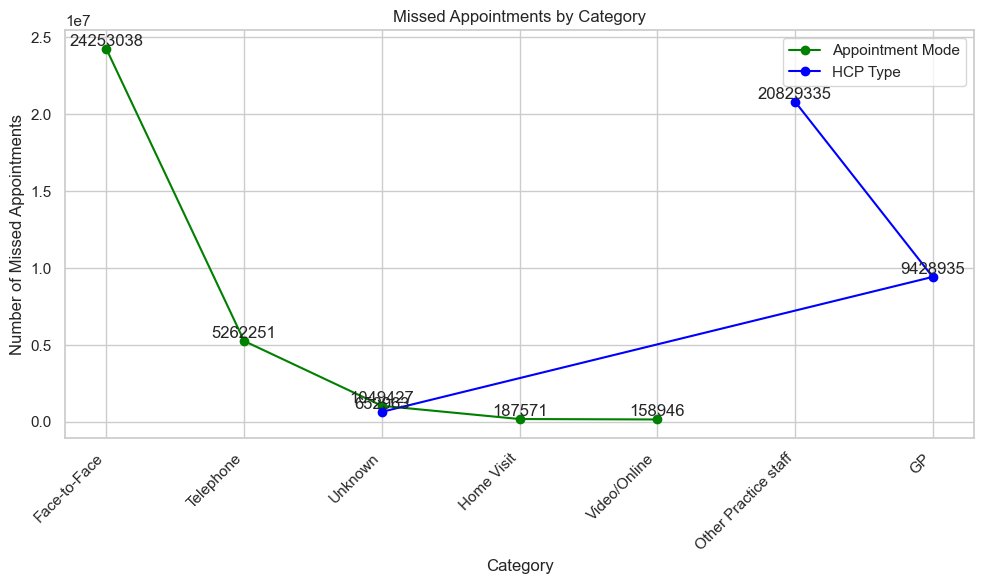

In [75]:
import matplotlib.pyplot as plt

# Group the missed appointments data by 'appointment_mode' and sum the counts
missed_by_mode = missed_appointments_df.groupby('appointment_mode')['count_of_appointments'].sum()

# Convert the grouped data to a DataFrame for easier plotting
missed_by_mode_df = missed_by_mode.reset_index()

# Sort the DataFrame by count_of_appointments in descending order
missed_by_mode_df = missed_by_mode_df.sort_values(by='count_of_appointments', ascending=False)

# Group the missed appointments data by 'hcp_type' and sum the counts
missed_by_hcp = missed_appointments_df.groupby('hcp_type')['count_of_appointments'].sum()

# Convert the grouped data to a DataFrame for easier plotting
missed_by_hcp_df = missed_by_hcp.reset_index()

# Sort the DataFrame by count_of_appointments in descending order
missed_by_hcp_df = missed_by_hcp_df.sort_values(by='count_of_appointments', ascending=False)

# Plotting the curves
plt.figure(figsize=(10, 6))

# Plot the curve for appointment mode
plt.plot(missed_by_mode_df['appointment_mode'], missed_by_mode_df['count_of_appointments'], marker='o', color='green', linestyle='-', label='Appointment Mode')

# Plot the curve for hcp_type
plt.plot(missed_by_hcp_df['hcp_type'], missed_by_hcp_df['count_of_appointments'], marker='o', color='blue', linestyle='-', label='HCP Type')

plt.xlabel('Category')
plt.ylabel('Number of Missed Appointments')
plt.title('Missed Appointments by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

# Adding count_of_appointments as text labels for appointment mode
for x, y in zip(missed_by_mode_df['appointment_mode'], missed_by_mode_df['count_of_appointments']):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Adding count_of_appointments as text labels for hcp_type
for x, y in zip(missed_by_hcp_df['hcp_type'], missed_by_hcp_df['count_of_appointments']):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

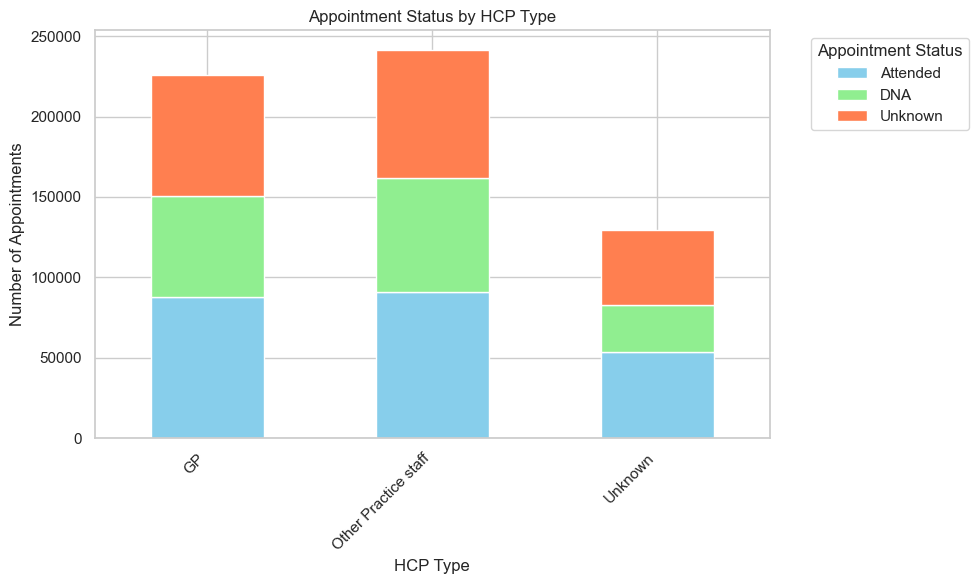

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming icb_data is your DataFrame with 'hcp_type' and 'appointment_status' columns
# Load your data into the DataFrame icb_data

# Example Data Loading:
icb_data = pd.read_csv('icb_data.csv')

# Grouping the data by 'hcp_type' and 'appointment_status' and counting the occurrences
grouped_data = icb_data.groupby(['hcp_type', 'appointment_status']).size().unstack()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Setting figure size

# Creating the bar chart
grouped_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'lightgreen', 'coral'])

# Adding titles and labels
plt.title('Appointment Status by HCP Type')
plt.xlabel('HCP Type')
plt.ylabel('Number of Appointments')

# Adding legend
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Demand Vs Capacity 

### calculations are used based on core model which is added to the technical report

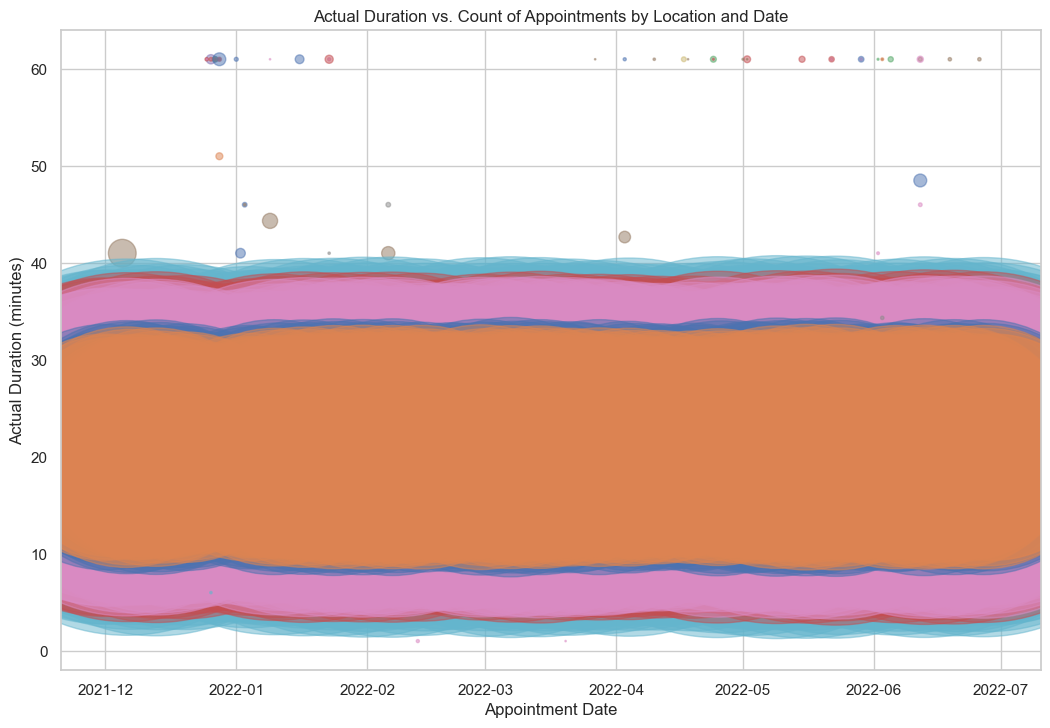

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the modified DataFrame from CSV file
actual_df= pd.read_csv('modified_actual_duration.csv')

# Convert 'appointment_date' to datetime object
actual_df['appointment_date'] = pd.to_datetime(actual_df['appointment_date'])

# Group by 'sub_icb_location_name' and 'appointment_date' and calculate the sum of 'count_of_appointments' and mean of 'actual_duration'
grouped_df = actual_df.groupby(['icb_ons_code', 'appointment_date']).agg({'count_of_appointments': 'sum', 'actual_duration': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))  # Increased figure size

# Loop through each 'sub_icb_location_name'
for location in grouped_df['icb_ons_code'].unique():
    temp_df = grouped_df[grouped_df['icb_ons_code'] == location]
    plt.scatter(temp_df['appointment_date'], temp_df['actual_duration'], s=temp_df['count_of_appointments'],alpha=0.5)

plt.title('Actual Duration vs. Count of Appointments by Location and Date')
plt.xlabel('Appointment Date')
plt.ylabel('Actual Duration (minutes)')
plt.grid(True)

# Manually adjust margins and spacing
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

#This is to show an average appoitment duration 

plt.show()

#### Assumptions are made based on NHS workforce statistics, NHS defined full-time working to be 37.5 hours per week and 7.5 hours per day. Full-time equivalent is a standardised measure of the workload of an employed person.The Demand and Capacity tools provided by NHS  has a range of models and I have chosen core model to suite current needs. However due to limitations of data available eg no info on new referals, expected waiting times etc the accuracy of key metrics like capacity and demand is limited.

In [78]:
import pandas as pd

def calculate_capacity(shift_hours, total_working_days):
    # Load the data from the CSV file
    actual_df = pd.read_csv('modified_actual_duration.csv')

    # Assuming 'duration' column in actual_df represents the duration of each appointment in hours
    # Calculate the average appointment duration
    average_duration_hours = actual_df['actual_duration'].mean()

    # Calculate the capacity
    capacity_per_day = (shift_hours * total_working_days) / average_duration_hours

    return capacity_per_day

def calculate_weekly_demand(demand_per_day, total_working_days):
    # Calculate the weekly demand
    weekly_demand = demand_per_day * total_working_days
    return weekly_demand

# Example shift parameters
shift_hours = 7.5  # hours
total_working_days = 5  # days

# Calculate capacity using the provided shift parameters
capacity_per_day = calculate_capacity(shift_hours, total_working_days)

# Assuming demand_per_day is provided or computed elsewhere
demand_per_day = 100  # Example demand per day

# Calculate weekly demand
weekly_demand = calculate_weekly_demand(demand_per_day, total_working_days)

print("Capacity per day:", capacity_per_day, "appointments")
print("Weekly demand:", weekly_demand, "appointments")

Capacity per day: 1.7822343852988116 appointments
Weekly demand: 500 appointments


In [80]:
import pandas as pd

# Load the datasets
national_categories = pd.read_csv('national_categories.csv')
appointments_regional = pd.read_csv('appointments_regional.csv')
actual_duration = pd.read_csv('actual_duration.csv')

In [81]:
# Concatenate the datasets into one DataFrame
all_appointments = pd.concat([national_categories, appointments_regional, actual_duration])

# Assuming 'appointment_date' column represents the date of each appointment
# Convert 'appointment_date' to datetime format
all_appointments['appointment_date'] = pd.to_datetime(all_appointments['appointment_date'])

# Extract the day of the week from 'appointment_date'
all_appointments['day_of_week'] = all_appointments['appointment_date'].dt.day_name()

# Group by 'day_of_week' and calculate the sum of appointments for each day
weekly_counts = all_appointments.groupby('day_of_week')['count_of_appointments'].sum()

# Calculate the average count of appointments per day
average_count_per_day = weekly_counts.mean()

print("Weekly Capacity per Day based on Count of Appointments:")
print(weekly_counts)
print("Average Count of Appointments per Day:", average_count_per_day)

Weekly Capacity per Day based on Count of Appointments:
day_of_week
Friday       73180204
Monday       91904072
Saturday     24842838
Sunday       13456696
Thursday     87036826
Tuesday      86848346
Wednesday    86758480
Name: count_of_appointments, dtype: int64
Average Count of Appointments per Day: 66289637.428571425


In [82]:
import math

# Define the number of hours worked per day by each FTE employee
hours_per_day_per_fte = 7.5  # Assuming each FTE works 7.5 hours per day

# Calculate the capacity per day based on the count of appointments
# You can replace this with your actual calculated capacity per day
capacity_per_day = 100

# Calculate the number of FTE employees required
fte_required = math.ceil(capacity_per_day / hours_per_day_per_fte)

print("Capacity per Day:", capacity_per_day, "appointments")
print("Hours per Day per FTE:", hours_per_day_per_fte, "hours")
print("Required Full-Time Equivalent (FTE) Employees:", fte_required)

Capacity per Day: 100 appointments
Hours per Day per FTE: 7.5 hours
Required Full-Time Equivalent (FTE) Employees: 14


In [83]:
import pandas as pd
import math

# Load the datasets
national_categories = pd.read_csv('national_categories.csv')
appointments_regional = pd.read_csv('appointments_regional.csv')
actual_duration = pd.read_csv('actual_duration.csv')

# Concatenate the datasets into one DataFrame
all_appointments = pd.concat([national_categories, appointments_regional, actual_duration])

# Assuming 'appointment_date' column represents the date of each appointment
# Convert 'appointment_date' to datetime format
all_appointments['appointment_date'] = pd.to_datetime(all_appointments['appointment_date'])

# Calculate the total number of appointments
total_appointments = len(all_appointments)

# Calculate the actual capacity per day
# Assuming each appointment lasts for 7.5 hours on average (7.5 hours is the standard shift)
# You can replace this with your actual calculation based on the duration of appointments
average_duration_per_appointment_hours = 7.5 / 60  # Convert to hours

# Calculate the actual capacity per day based on the total duration of appointments
actual_capacity_per_day = total_appointments * average_duration_per_appointment_hours

# Define the number of hours worked per day by each FTE employee
hours_per_day_per_fte = 7.5  # Assuming each FTE works 7.5 hours per day

# Calculate the actual headcount based on the actual capacity per day
actual_headcount_per_day = math.ceil(actual_capacity_per_day / hours_per_day_per_fte)

# Calculate the total actual headcount for the week
total_actual_headcount = actual_headcount_per_day * 7  # Assuming a 7-day workweek

print("Total Actual Capacity per Day:", actual_capacity_per_day, "hours")
print("Actual Headcount per Day:", actual_headcount_per_day)
print("Total Actual Headcount for the Week:", total_actual_headcount)

Total Actual Capacity per Day: 194001.0 hours
Actual Headcount per Day: 25867
Total Actual Headcount for the Week: 181069


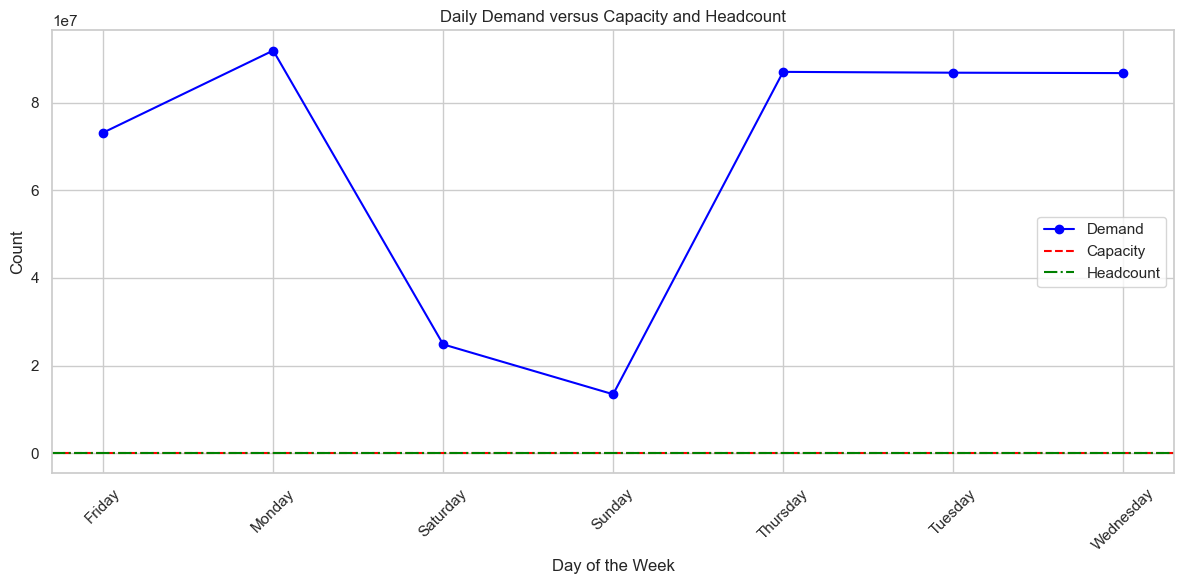

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the datasets
national_categories = pd.read_csv('national_categories.csv')
appointments_regional = pd.read_csv('appointments_regional.csv')
actual_duration = pd.read_csv('actual_duration.csv')

# Concatenate the datasets into one DataFrame
all_appointments = pd.concat([national_categories, appointments_regional, actual_duration])

# Assuming 'appointment_date' column represents the date of each appointment
# Convert 'appointment_date' to datetime format
all_appointments['appointment_date'] = pd.to_datetime(all_appointments['appointment_date'])

# Extract the day of the week from 'appointment_date'
all_appointments['day_of_week'] = all_appointments['appointment_date'].dt.day_name()

# Calculate the daily demand and capacity
daily_demand = all_appointments.groupby('day_of_week')['count_of_appointments'].sum()

# Calculate the capacity per day
# You can replace this with your actual calculated capacity per day
capacity_per_day = 100

# Calculate the headcount based on capacity per day
def calculate_headcount(capacity_per_day, hours_per_day_per_fte):
    return math.ceil(capacity_per_day / hours_per_day_per_fte)

# Define the number of hours worked per day by each FTE employee
hours_per_day_per_fte = 7.5  # Assuming each FTE works 8 hours per day

# Calculate the headcount
headcount = calculate_headcount(capacity_per_day, hours_per_day_per_fte)

# Create a DataFrame for visualization
df = pd.DataFrame({'Day': daily_demand.index, 'Demand': daily_demand.values})
df['Capacity'] = capacity_per_day
df['Headcount'] = headcount

# Plotting daily demand versus capacity and headcount
plt.figure(figsize=(12, 6))

# Plotting demand and capacity
plt.plot(df['Day'], df['Demand'], marker='o', color='blue', label='Demand')
plt.axhline(y=capacity_per_day, color='red', linestyle='--', label='Capacity')

# Plotting headcount
plt.axhline(y=headcount, color='green', linestyle='-.', label='Headcount')

plt.title('Daily Demand versus Capacity and Headcount')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

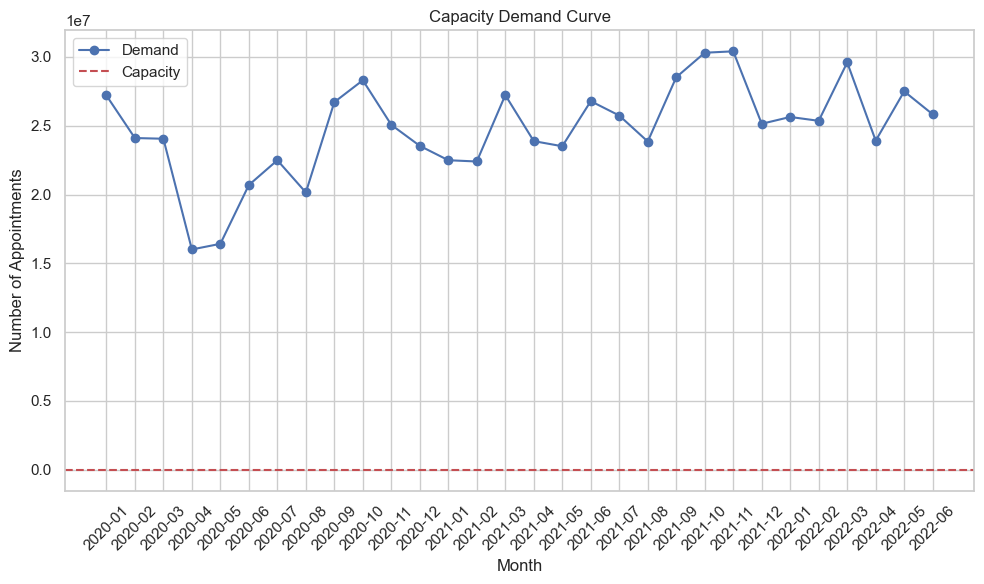

In [85]:
# Load the data from appointments_regional.csv
appointments_regional = pd.read_csv('appointments_regional.csv')

# 'count_of_appointments' column represents the number of appointments for each record
# 'appointment_month' column represents the month of the appointment

# Calculate total demand for appointments for each month
total_demand_per_month = appointments_regional.groupby('appointment_month')['count_of_appointments'].sum()

# Load the data from modified_actual_duration.csv to get average appointment duration
actual_df = pd.read_csv('modified_actual_duration.csv')
average_duration_hours = actual_df['actual_duration'].mean()

# Total working hours per day
total_working_hours_per_day = 7.5  # hours

# Calculate the capacity for each month based on the average appointment duration and total working hours per day
capacity_per_month = total_working_hours_per_day * 30 / average_duration_hours  # Assuming 30 days in a month

# Create the capacity demand curve
plt.figure(figsize=(10, 6))
plt.plot(total_demand_per_month.index, total_demand_per_month.values, label='Demand', marker='o')
plt.axhline(y=capacity_per_month, color='r', linestyle='--', label='Capacity')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Capacity Demand Curve')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

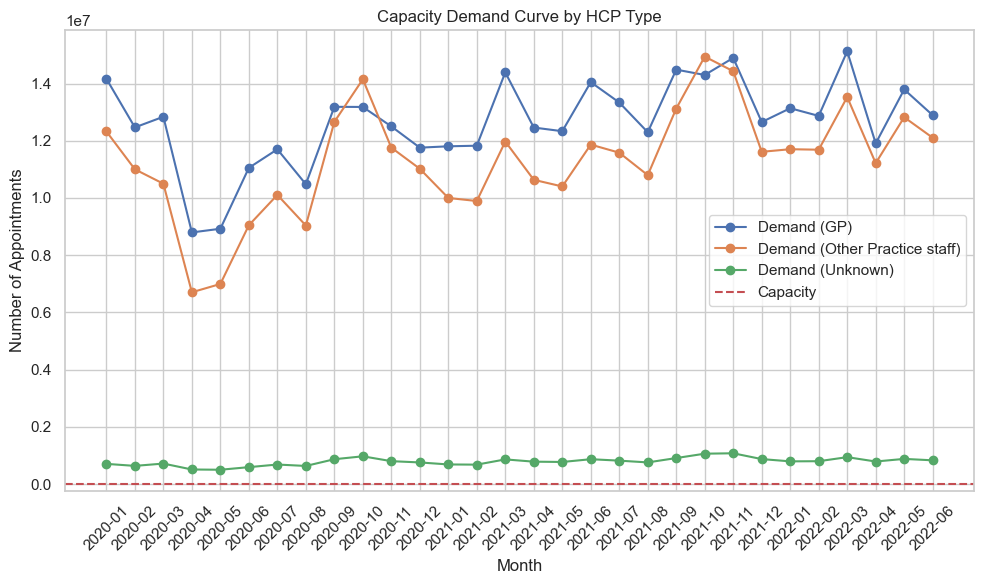

In [86]:
# Load the data from appointments_regional.csv
appointments_regional = pd.read_csv('appointments_regional.csv')

# 'count_of_appointments' column represents the number of appointments for each record
# 'appointment_month' column represents the month of the appointment
# 'hcp_type' column represents the type of healthcare provider

# Calculate total demand for appointments for each month and hcp_type
total_demand_per_month_hcp = appointments_regional.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum()

# Load the data from modified_actual_duration.csv to get average appointment duration
actual_df = pd.read_csv('modified_actual_duration.csv')
average_duration_hours = actual_df['actual_duration'].mean()

# Total working hours per day
total_working_hours_per_day = 7.5  # hours

# Calculate the capacity for each month based on the average appointment duration and total working hours per day
capacity_per_month = total_working_hours_per_day * 30 / average_duration_hours  # Assuming 30 days in a month

# Create the capacity demand curve for each hcp_type
plt.figure(figsize=(10, 6))
for hcp_type, data in total_demand_per_month_hcp.groupby(level='hcp_type'):
    plt.plot(data.index.get_level_values('appointment_month'), data.values, marker='o', label=f'Demand ({hcp_type})')

# Plot the capacity line
plt.axhline(y=capacity_per_month, color='r', linestyle='--', label='Capacity')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('Capacity Demand Curve by HCP Type')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

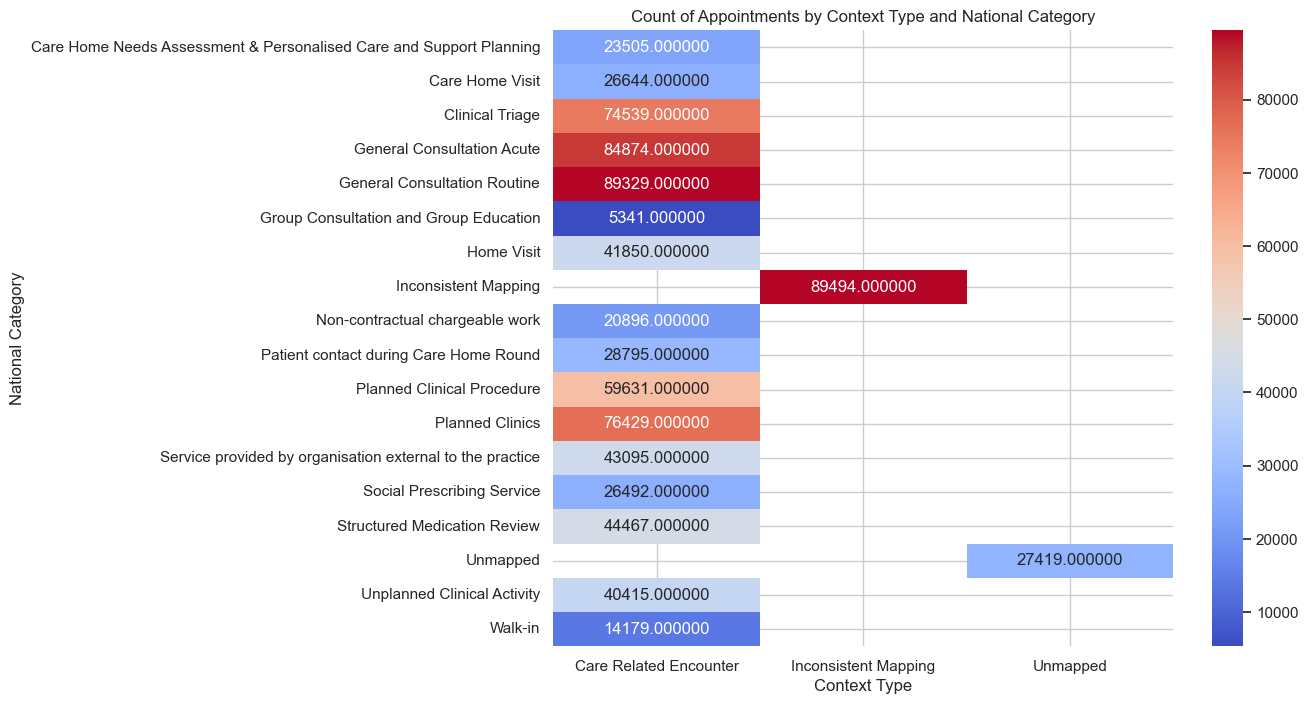

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the national_categories dataset
national_categories = pd.read_csv('national_categories.csv')

# Create a heatmap to visualize relationships between categorical variables
heatmap_data = national_categories.groupby(['context_type', 'national_category']).size().unstack()
heatmap_data = heatmap_data.transpose()  # Transpose the DataFrame

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='2f')
plt.xlabel('Context Type')
plt.ylabel('National Category')
plt.title('Count of Appointments by Context Type and National Category')
plt.show()

### Waiting times 

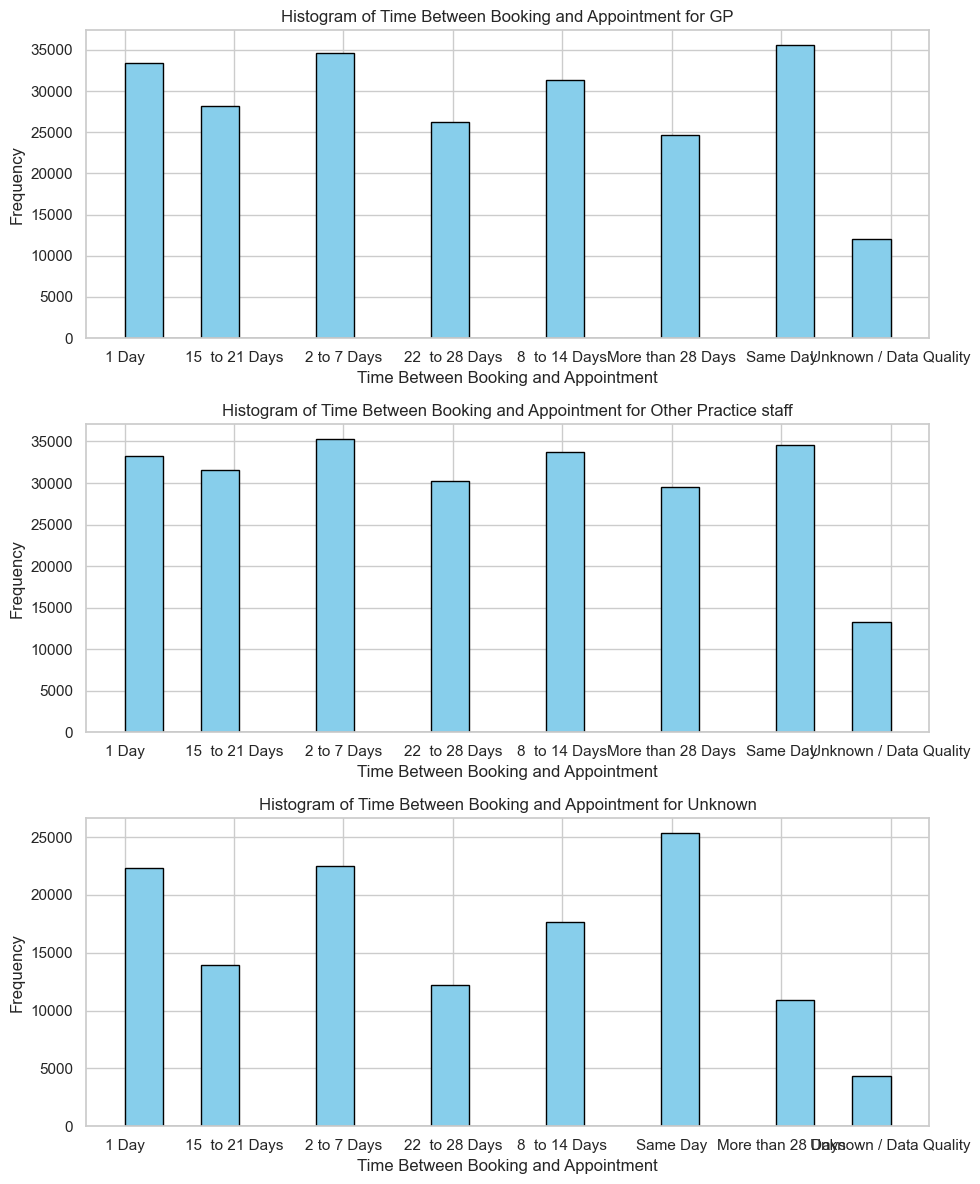

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
nhs_icb_data = pd.read_csv('icb_data.csv')

# Create subplots for each hcp_type
hcp_types = nhs_icb_data['hcp_type'].unique()
num_hcp_types = len(hcp_types)

fig, axes = plt.subplots(nrows=num_hcp_types, ncols=1, figsize=(10, 4*num_hcp_types))

# Create histograms for each hcp_type
for idx, hcp_type in enumerate(hcp_types):
    subset_data = nhs_icb_data[nhs_icb_data['hcp_type'] == hcp_type]
    axes[idx].hist(subset_data['time_between_book_and_appointment'], bins=20, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Histogram of Time Between Booking and Appointment for {hcp_type}')
    axes[idx].set_xlabel('Time Between Booking and Appointment')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [89]:
#average waiting times for each HCP type can be calculated by coverting waiting times to integers 
#logically highest number is used to represent each range of time scales to improve accuracy 
def convert_time_to_int(descriptive_time):
    try:
        # Handle null or empty strings
        if pd.isnull(descriptive_time) or descriptive_time.strip() == '':
            return None  # Or a default value like 0

        descriptive_time = descriptive_time.lower().strip()

        if 'same day' in descriptive_time:
            return 0.5
        elif 'more than' in descriptive_time:
            # Safely extract numbers after 'more than'
            parts = descriptive_time.split('more than')
            if len(parts) > 1:
                num = ''.join(filter(str.isdigit, parts[1]))
                if num:  # Checks if num is not an empty string
                    return int(num)
                else:
                    return None  # Or handle as a specific case
        elif 'to' in descriptive_time:
            # Safely extract and use the highest number in ranges
            parts = descriptive_time.split('to')
            if len(parts) > 1:
                num = ''.join(filter(str.isdigit, parts[-1]))
                if num:
                    return int(num)
                else:
                    return None  # Or handle as a specific case
        else:
            # Directly convert numbers, assuming 'X day(s)'
            num = ''.join(filter(str.isdigit, descriptive_time))
            if num:
                return int(num)
            else:
                return None  # Handle unexpected formats or text
    except ValueError as e:
        print(f"Conversion error with '{descriptive_time}': {e}")
        return None

# Apply the conversion function
appointments_regional['time_between_book_and_appointment_int'] = appointments_regional['time_between_book_and_appointment'].apply(convert_time_to_int)

# Verify the results
print(appointments_regional[['time_between_book_and_appointment', 'time_between_book_and_appointment_int']].head())

  time_between_book_and_appointment  time_between_book_and_appointment_int
0                             1 Day                                    1.0
1                    15  to 21 Days                                   21.0
2                       2 to 7 Days                                    7.0
3                    22  to 28 Days                                   28.0
4                     8  to 14 Days                                   14.0


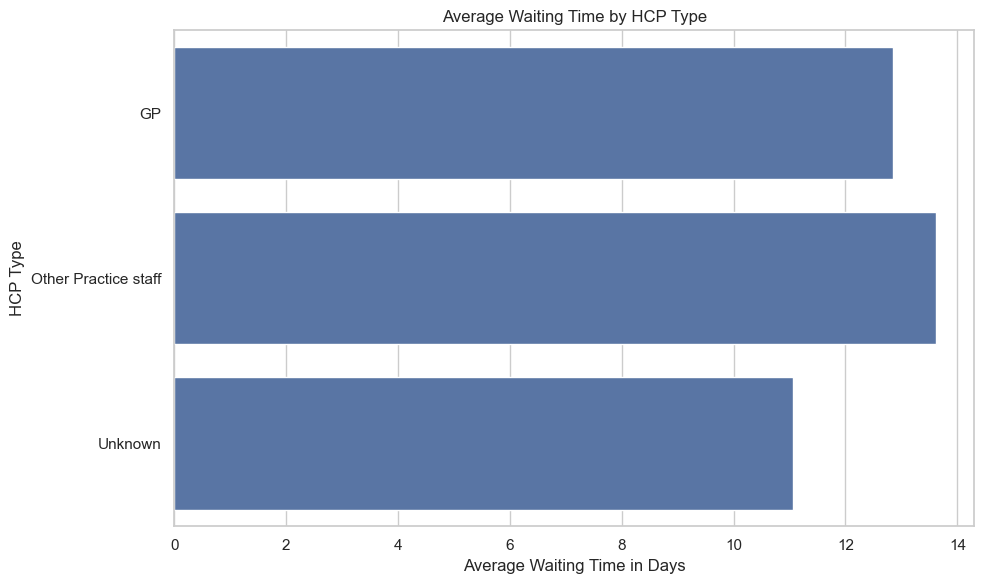

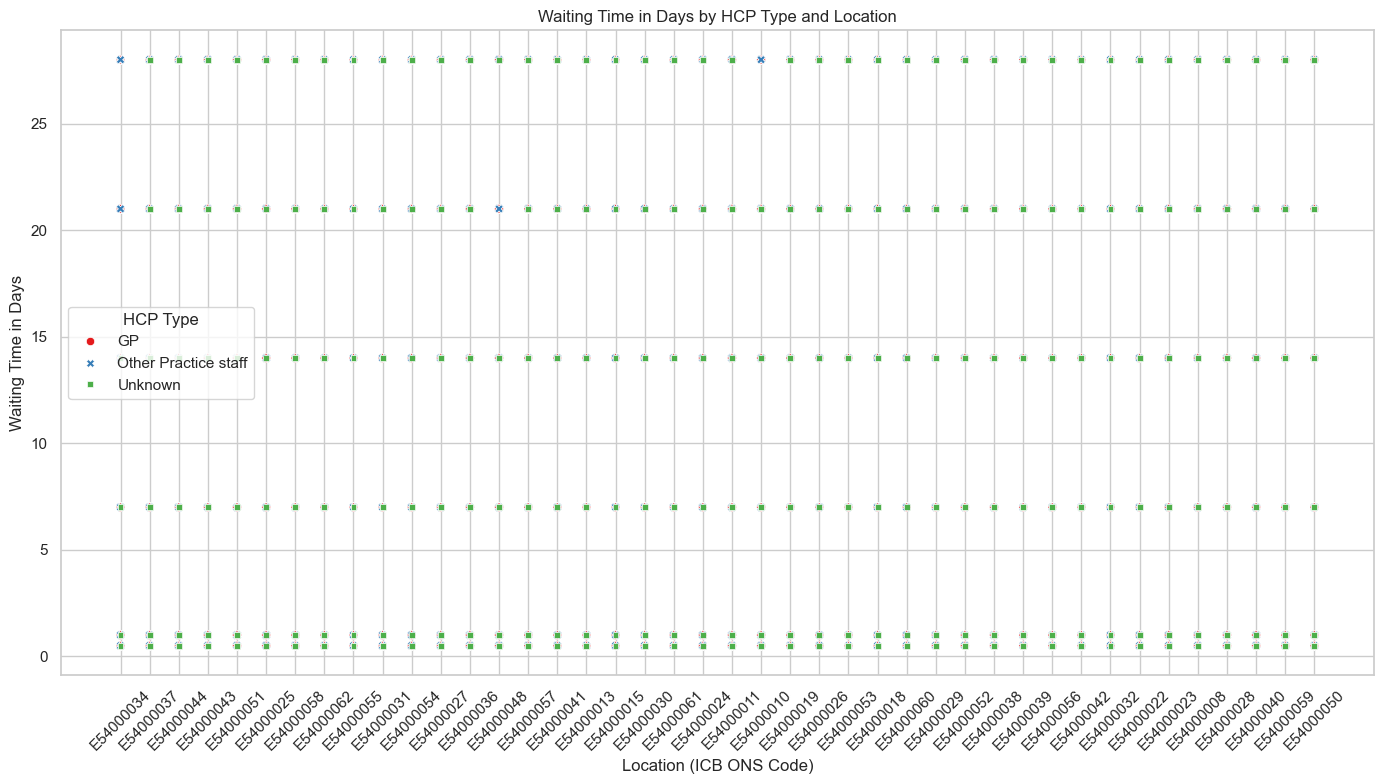

In [90]:
#Above caluations are used to average each appointment times by HCP type & Location based 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (or ensure it's already loaded)
# appointments_regional = pd.read_csv('appointments_regional.csv')

# Use the refined waiting time in days
appointments_regional['waiting_time_in_days'] = appointments_regional['time_between_book_and_appointment_int']

# Calculate the average waiting time by hcp_type
average_waiting_time_by_hcp = appointments_regional.groupby('hcp_type')['waiting_time_in_days'].mean().reset_index()

# Visualize the average waiting time by hcp_type
plt.figure(figsize=(10, 6))
sns.barplot(x='waiting_time_in_days', y='hcp_type', data=average_waiting_time_by_hcp, ci=None)
plt.title('Average Waiting Time by HCP Type')
plt.xlabel('Average Waiting Time in Days')
plt.ylabel('HCP Type')
plt.tight_layout()
plt.show()

# If you're interested in exploring the relationship including 'icb_ons_code' (location),
# you might consider a scatter plot or a grouped bar chart, depending on the data nature and what you want to emphasize.

# Assuming 'icb_ons_code' represents different locations and you want to show variation in waiting times across locations
# for each HCP type:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='icb_ons_code', y='waiting_time_in_days', hue='hcp_type', data=appointments_regional, palette='Set1', style='hcp_type')
plt.title('Waiting Time in Days by HCP Type and Location')
plt.xlabel('Location (ICB ONS Code)')
plt.xticks(rotation=45)
plt.ylabel('Waiting Time in Days')
plt.legend(title='HCP Type')
plt.tight_layout()
plt.show()

### ICB dataset cleaned 

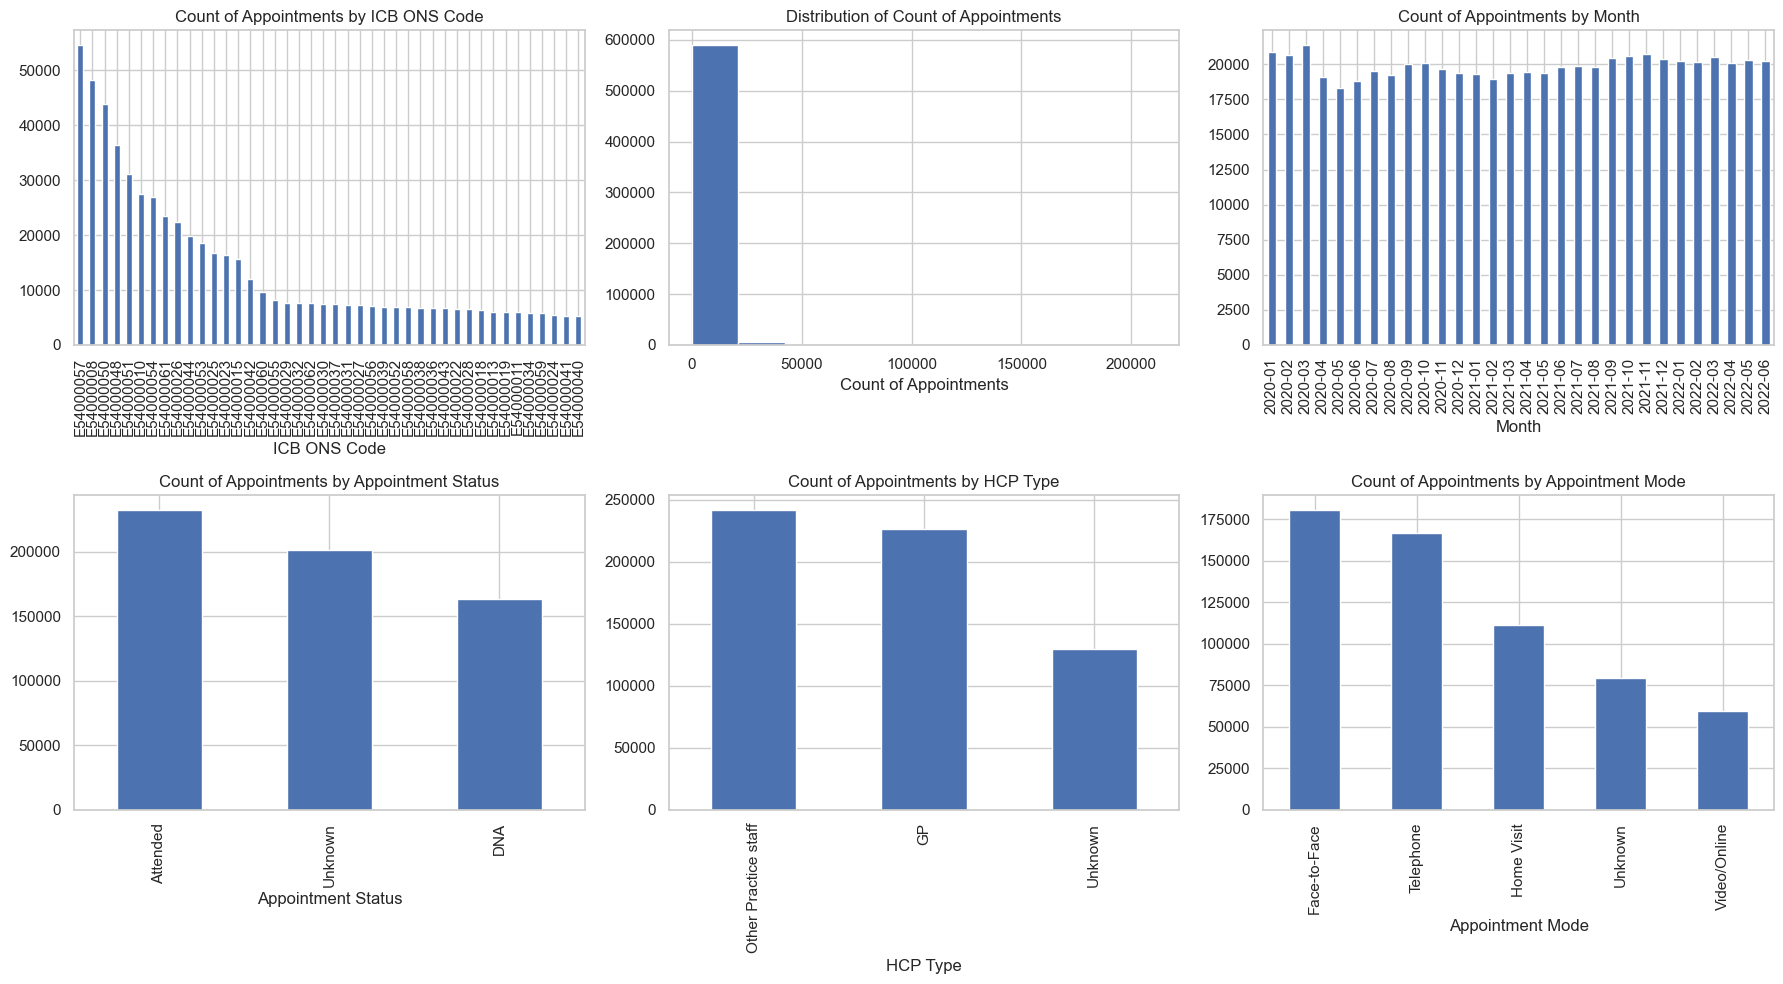

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

def get_icb():
    # Load the cleaned dataset into a DataFrame
    icb_data_cleaned = pd.read_csv('icb_data_cleaned.csv')

    # Set up subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

    # Visualize 'icb_ons_code'
    icb_data_cleaned['icb_ons_code'].value_counts().plot(kind='bar', ax=axes[0, 0])
    axes[0, 0].set_title('Count of Appointments by ICB ONS Code')
    axes[0, 0].set_xlabel('ICB ONS Code')

    # Visualize 'count_of_appointments'
    icb_data_cleaned['count_of_appointments'].hist(ax=axes[0, 1])
    axes[0, 1].set_title('Distribution of Count of Appointments')
    axes[0, 1].set_xlabel('Count of Appointments')

    # Visualize 'appointment_month'
    icb_data_cleaned['appointment_month'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 2])
    axes[0, 2].set_title('Count of Appointments by Month')
    axes[0, 2].set_xlabel('Month')

    # Visualize 'appointment_status'
    icb_data_cleaned['appointment_status'].value_counts().plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Count of Appointments by Appointment Status')
    axes[1, 0].set_xlabel('Appointment Status')

    # Visualize 'hcp_type'
    icb_data_cleaned['hcp_type'].value_counts().plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Count of Appointments by HCP Type')
    axes[1, 1].set_xlabel('HCP Type')

    # Visualize 'appointment_mode'
    icb_data_cleaned['appointment_mode'].value_counts().plot(kind='bar', ax=axes[1, 2])
    axes[1, 2].set_title('Count of Appointments by Appointment Mode')
    axes[1, 2].set_xlabel('Appointment Mode')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Call the function
get_icb()

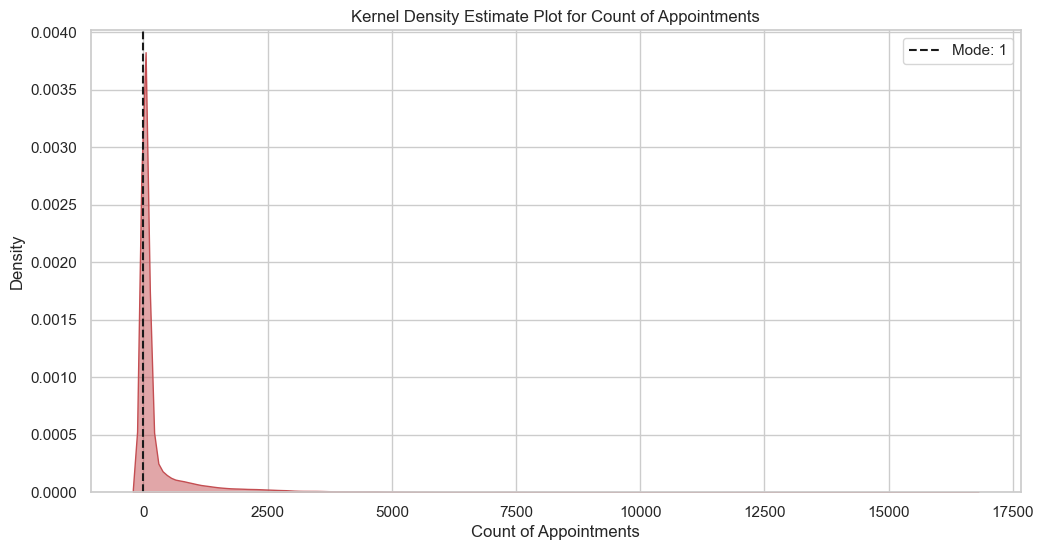

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
national_categories = pd.read_csv('national_categories.csv')

# Calculate the mode of the 'count_of_appointments' directly from the data
mode_value = national_categories['count_of_appointments'].mode()[0]

# Visualization of the distribution of 'count_of_appointments' using a Kernel Density Estimate (KDE) plot
plt.figure(figsize=(12, 6))
sns.kdeplot(national_categories['count_of_appointments'], shade=True, color="r", alpha=0.5)
plt.title('Kernel Density Estimate Plot for Count of Appointments')
plt.xlabel('Count of Appointments')
plt.ylabel('Density')

# Annotate the mode on the plot
plt.axvline(x=mode_value, color='k', linestyle='--', label=f'Mode: {mode_value}')
plt.legend()

# Show the plot
plt.show()

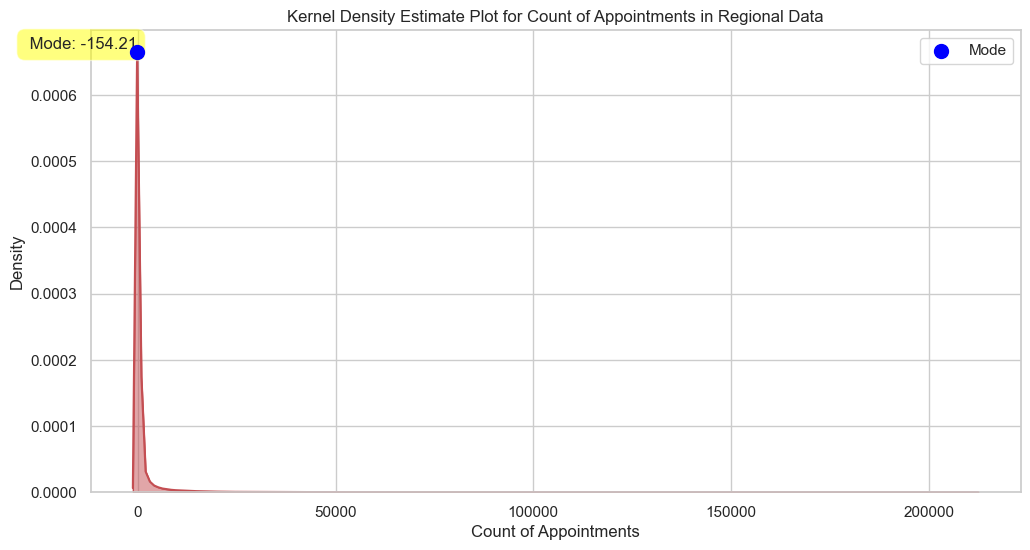

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
appointments_regional = pd.read_csv('appointments_regional.csv')

#count of appointments 
if 'count_of_appointments' in appointments_regional.columns:
    # Generate the KDE plot
    plt.figure(figsize=(12, 6))
    sns.kdeplot(appointments_regional['count_of_appointments'], shade=True, color="r", alpha=0.5)
    plt.title('Kernel Density Estimate Plot for Count of Appointments in Regional Data')
    plt.xlabel('Count of Appointments')
    plt.ylabel('Density')

    # Calculate the mode of the 'count_of_appointments'
    density = sns.kdeplot(appointments_regional['count_of_appointments'], color="r").get_lines()[0].get_data()
    x, y = density
    mode_x = x[np.argmax(y)]
    
    # Highlight the mode with a prominent marker and annotate with a box
    plt.scatter(mode_x, np.max(y), color='blue', s=100, label='Mode', zorder=5)  # Add a scatter plot marker for the mode
    plt.text(mode_x, np.max(y), f' Mode: {mode_x:.2f}', fontsize=12, 
             ha='right', va='bottom',
             bbox=dict(facecolor='yellow', alpha=0.5, boxstyle='round,pad=0.5'))

    plt.legend()

    # Show the plot
    plt.show()
else:
    print("The column 'count_of_appointments' does not exist in the dataset.")

In [104]:
#mode doesnt give any specific information 

## Patterns and Use Case Insights

In [22]:
correlation_matrix = national_categories.corr()
print(correlation_matrix['count_of_appointments'].sort_values(ascending=False))


count_of_appointments    1.0
Name: count_of_appointments, dtype: float64


In [1]:
import numpy
numpy.version.version

'1.26.3'

## Findings:
### 1.	Data Quality and Completeness: 
There are no missing values in all datasets however there are duplicates in appointments regional. There is also columnn named actual_duration that is an object instead of int under dataset actual_duration. Duplicates in Appointments Regional: Conduct a thorough investigation to understand the reasons behind the duplicates and implement measures to remove or handle them appropriately.
Actual Duration Data Type: Convert the 'actual_duration' column in the 'actual_duration' dataset to the correct data type (int) for consistency and accurate analysis.
### 2.	Service Utilization: 
The national categories dataset shows that the number of appointments changes a lot from month to month, with most of the changes happening in the fall and spring. This might be because of seasonal health problems or because regular check-ups happen at these times. More missing appointments in summer compared to other seasons. Demand on GP appointments is clearly more compared to other.
Dynamic Resource Allocation: Implement dynamic resource allocation strategies to adjust capacity based on seasonal patterns, ensuring optimal utilization of resources during high-demand periods.
Scheduling Optimization: Explore scheduling optimization techniques to efficiently manage appointment times, grouping shorter appointments to enhance scheduling efficiency. 
### 3.	Resource Utilization: 
The data on actual lengths of appointments shows that most of them are short (1-10 minutes and 11-15 minutes being the most common durations). A lot of appointments, though, are marked as "Unknown/Data Quality," which could mean that there are problems with the recording or the quality of the data that need to be fixed.
Improve Data Recording: Address issues related to the recording of appointment lengths, ensuring accurate and complete data collection to enhance resource utilization analysis and decision-making.
### 4.	Seasonal Trends: 
There is a clear seasonal pattern to the number of appointments. The most appointments happen in the fall, and the fewest happen in the summer. This could be a sign of seasonal health problems or changes in how patients act.
Understanding Seasonal Patterns: Conduct further analysis to understand the underlying reasons for seasonal trends in appointment numbers, enabling proactive measures to address seasonal health issues and patient behaviors.
### 5.	Missed Appointments: 
The appointments regional dataset says that there are 30911233 missed appointments, on visualistion missing appointments are consistant throughout. There is a decrease in trend but there is a significant impact on output. 
Audit Missed Appointments Data: Conduct an audit of missed appointments data to ensure accuracy and identify potential areas for improvement in appointment management and patient communication.
Develop Data Collection Model: Develop a simplified and adaptable data collection model to ensure uniform and accurate recording of missed appointments data.
### 6.	Public Sentiment: 
A look at Twitter data showed that there are several hashtags related to healthcare, with "healthcare" being the most common. This shows that people are paying a lot of attention to health issues, which the NHS could use for campaigns and education about health.Utilise Twitter Data: Leverage insights from Twitter data to inform communication strategies and public engagement efforts. Align campaigns and education initiatives with public interests and concerns to maximize engagement and awareness.

## Recommendations:
### 1.	Infrastructure and Resources: 
Because of seasonal patterns, the NHS might want to think about distributing resources more dynamically throughout the year, increasing capacity in the fall and spring when demand is high and decreasing it in the summer when demand is low.
### 2.	Setting up appointments: 
Since appointment times vary, there may be a way to make scheduling more efficient. For example, shorter appointments could be grouped together to make the schedule more efficient and cut down on empty time.
### 3.	Getting better data quality: 
The fact that appointment lengths fall into the "Unknown / Data Quality" category suggests that the NHS should look at how it collects data to make this metric more accurate.
### 4.	Public Engagement: 
Hashtags on Twitter could give the NHS information that would help them better match their communication strategies with what the public cares about. For instance, campaigns that focus on topics that are popular may get more people involved and make them more aware.
### 5.	Appointments Not Kept Data: 
To make sure the process of recording missed appointments is correct, the NHS should do an audit. If this is true, look into why so few people are missing their appointments. For this a more simple and adaptable model is required for obtaining a uniform collection of data.:

In [101]:
#Refer to report & presntation for futher analysis & conclusions